<b>Objective</b></br>
To build a regression model that predicts the trip duration in minutes.

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

from scipy import stats #shapiro - Normality, boxcox - transformation

import statsmodels.api as sm #OLS, QQPLOT - Normality

import statsmodels.stats.api as sms  #heteroskedasticity

from statsmodels.stats.stattools import durbin_watson # autocorrelation

from statsmodels.stats.outliers_influence import variance_inflation_factor # multicollinearity

from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.linear_model import SGDRegressor # Stochastic gradient descent
from sklearn.linear_model import Ridge # ridge regularization
from sklearn.linear_model import Lasso # lasso regualrization
from sklearn.linear_model import ElasticNet # elasticnet regularization

from sklearn.model_selection import train_test_split # train_test_split
from sklearn.model_selection import KFold # Kfold
from sklearn.model_selection import cross_val_score # kfold similar
from sklearn.model_selection import LeaveOneOut # LOOCV
from sklearn.model_selection import GridSearchCV # GridsearchCV

from sklearn.metrics import mean_squared_error # performance measure
from sklearn.metrics import mean_absolute_error # performance measure
from sklearn.metrics import r2_score # performance measure
from sklearn.metrics import mean_absolute_percentage_error # performance measure

from mlxtend.feature_selection import SequentialFeatureSelector as sfs # feature selection
from sklearn.feature_selection import RFE # RFE feature selection

from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.preprocessing import MinMaxScaler #feature scaling
from sklearn.preprocessing import LabelEncoder #Label encoding
from sklearn.preprocessing import OrdinalEncoder #Ordinal encoding

from category_encoders import TargetEncoder # target encoding

from sklearn.neighbors import KNeighborsRegressor  # Import KNN Regressor
from sklearn.tree import DecisionTreeRegressor     # Import Decision Tree Regressor - include max_depth
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Regressor - include n_estimators and max_depth
from sklearn.ensemble import AdaBoostRegressor     # Import AdaBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor # Import Gradient Boosting Regressor
from xgboost import XGBRegressor # Import XGB Regressor

<b> Linear Regression Models with all Features</b>

In [4]:
# import the cleaned dataset
df = pd.read_csv('cleaned_taxi_dataset')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday


In [5]:
# dataframe shape
df.shape

(132015, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               132015 non-null  int64  
 1   tpep_pickup_datetime   132015 non-null  object 
 2   tpep_dropoff_datetime  132015 non-null  object 
 3   passenger_count        132015 non-null  int64  
 4   trip_distance          132015 non-null  float64
 5   RatecodeID             132015 non-null  float64
 6   store_and_fwd_flag     132015 non-null  object 
 7   PULocationID           132015 non-null  int64  
 8   DOLocationID           132015 non-null  int64  
 9   payment_type           132015 non-null  int64  
 10  fare_amount            132015 non-null  float64
 11  extra                  132015 non-null  float64
 12  mta_tax                132015 non-null  float64
 13  tip_amount             132015 non-null  float64
 14  tolls_amount           132015 non-nu

In [7]:
# date time dtype conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [16]:
# create a new feature trip_duration in mins
df['trip_duration_mins'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60, 1)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day,trip_duration_mins
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday,10.6
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday,5.1
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday,14.2
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday,9.2
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday,13.5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               132015 non-null  int64         
 1   tpep_pickup_datetime   132015 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  132015 non-null  datetime64[ns]
 3   passenger_count        132015 non-null  int64         
 4   trip_distance          132015 non-null  float64       
 5   RatecodeID             132015 non-null  float64       
 6   store_and_fwd_flag     132015 non-null  object        
 7   PULocationID           132015 non-null  int64         
 8   DOLocationID           132015 non-null  int64         
 9   payment_type           132015 non-null  int64         
 10  fare_amount            132015 non-null  float64       
 11  extra                  132015 non-null  float64       
 12  mta_tax                132015 non-null  floa

In [22]:
df1 = df.copy()

In [23]:
# as it can be seen from the five point summary, mta_tax and improvement surcharge has zero standard deviation. 
# Hence, it can be removed.

# additionally, since the minute column is created, secs column can be removed as it will have strong correlation with the minutes column.

df1.drop(columns = ['mta_tax', 'improvement_surcharge', 'trip_duration_secs'], inplace  = True )

In [24]:
# removing pickup dates and dropoff dates from the dataframe
df1.drop(columns = ['pickup_date', 'dropoff_date', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace = True)

In [25]:
# dropping other additional columns
df1.drop(columns = ['PU_Borough', 'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone', 'DO_service_zone'], inplace = True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132015 non-null  int64  
 1   passenger_count       132015 non-null  int64  
 2   trip_distance         132015 non-null  float64
 3   RatecodeID            132015 non-null  float64
 4   store_and_fwd_flag    132015 non-null  object 
 5   PULocationID          132015 non-null  int64  
 6   DOLocationID          132015 non-null  int64  
 7   payment_type          132015 non-null  int64  
 8   fare_amount           132015 non-null  float64
 9   extra                 132015 non-null  float64
 10  tip_amount            132015 non-null  float64
 11  tolls_amount          132015 non-null  float64
 12  total_amount          132015 non-null  float64
 13  congestion_surcharge  132015 non-null  float64
 14  Airport_fee           132015 non-null  float64
 15  

In [27]:
# Dtype conversion
df1['pickup_hour'] = df1['pickup_hour'].astype(object)
df1['VendorID'] = df1['VendorID'].astype(object)
df1['passenger_count'] = df1['passenger_count'].astype(object)
df1['RatecodeID'] = df1['RatecodeID'].astype(object)
df1['payment_type'] = df1['payment_type'].astype(object)
df1['pickup_hour'] = df1['pickup_hour'].astype(object)
df1['drop_hour'] = df1['drop_hour'].astype(object)

In [28]:
# split the target and response variables
target = df1['trip_duration_mins']
ind = df1.drop(columns = ['trip_duration_mins'])

<b>Variant - 1</b>

In [29]:
# response - transformed
target =  np.log(target)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132015 non-null  object 
 1   passenger_count       132015 non-null  object 
 2   trip_distance         132015 non-null  float64
 3   RatecodeID            132015 non-null  object 
 4   store_and_fwd_flag    132015 non-null  object 
 5   PULocationID          132015 non-null  int64  
 6   DOLocationID          132015 non-null  int64  
 7   payment_type          132015 non-null  object 
 8   fare_amount           132015 non-null  float64
 9   extra                 132015 non-null  float64
 10  tip_amount            132015 non-null  float64
 11  tolls_amount          132015 non-null  float64
 12  total_amount          132015 non-null  float64
 13  congestion_surcharge  132015 non-null  float64
 14  Airport_fee           132015 non-null  float64
 15  

In [31]:
# create numeric and categoric dataframes
num = ind.select_dtypes(include = 'number').drop(columns = ['PULocationID', 'DOLocationID'])
cat = ind.select_dtypes(include = 'object')
location = ind[['PULocationID', 'DOLocationID']]

In [32]:
cat.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'pickup_hour', 'drop_hour', 'pickup_day',
       'dropoff_day'],
      dtype='object')

In [33]:
num.columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [34]:
location.columns

Index(['PULocationID', 'DOLocationID'], dtype='object')

In [35]:
# dummy encoding of categoric variables

cat = pd.get_dummies(cat,drop_first=True).reset_index(drop=True)

In [36]:
cat.head()

,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [37]:
# skewness before transformation
num.skew()

trip_distance           2.815985
fare_amount             2.437830
extra                   3.199415
tip_amount              3.403773
tolls_amount            4.679393
total_amount            2.506175
congestion_surcharge   -4.015222
Airport_fee             3.130903
dtype: float64

In [38]:
# apply transformation methods for skewed variables
# independent variables
num['trip_distance'] = stats.boxcox(num['trip_distance'])[0]
num['fare_amount'] = stats.boxcox(num['fare_amount'])[0]
num['extra'] = np.sqrt(num['extra'])
num['tip_amount'] = np.sqrt(num['tip_amount'])
num['tolls_amount'] = stats.boxcox(num['tolls_amount']+1)[0]
num['total_amount'] = np.reciprocal(num['total_amount'])

In [40]:
# skewness after transformation
num.skew()

trip_distance          -0.060306
fare_amount             0.041498
extra                   0.204268
tip_amount              0.096310
tolls_amount            3.323468
total_amount            0.044589
congestion_surcharge   -4.015222
Airport_fee             3.130903
dtype: float64

In [41]:
# using standard scaler to scale the values

std = StandardScaler()
scaled = pd.DataFrame(std.fit_transform(num), columns = num.columns)
scaled.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee
0,-0.269078,-0.219212,-5.35649,-1.542640,-0.277696,1.119046,0.235269,-0.292141
1,-1.021943,-1.376655,-5.35649,-1.542640,-0.277696,2.809396,0.235269,-0.292141
2,0.071343,0.234288,-5.35649,-1.542640,-0.277696,0.448273,0.235269,-0.292141
3,0.134773,-0.219212,-5.35649,-0.570864,-0.277696,0.898182,0.235269,-0.292141
4,0.235023,0.156908,-5.35649,-0.570864,-0.277696,0.402157,0.235269,-0.292141


In [104]:
# concat the dataframe 
adf = pd.concat((scaled, cat, location), axis = 1)
adf.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,PULocationID,DOLocationID
0,-0.269078,-0.219212,-5.35649,-1.542640,-0.277696,1.119046,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,162,137
1,-1.021943,-1.376655,-5.35649,-1.542640,-0.277696,2.809396,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,43,230
2,0.071343,0.234288,-5.35649,-1.542640,-0.277696,0.448273,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,75,237
3,0.134773,-0.219212,-5.35649,-0.570864,-0.277696,0.898182,0.235269,-0.292141,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,238,166
4,0.235023,0.156908,-5.35649,-0.570864,-0.277696,0.402157,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,229,234


In [105]:
ddf = adf.copy()

In [43]:
# Assumptions to be satisfied before model building
# 1 - target variable should be numeric
# 2 - multicollinearity - corr matrix, heatmap, variance inflation factor

In [44]:
# Assumption : 1
target.dtype

dtype('float64')

In [45]:
# since the target variable is float64, it can be confirmed that the target variable is numeric and 
# first assumption is satisfied.

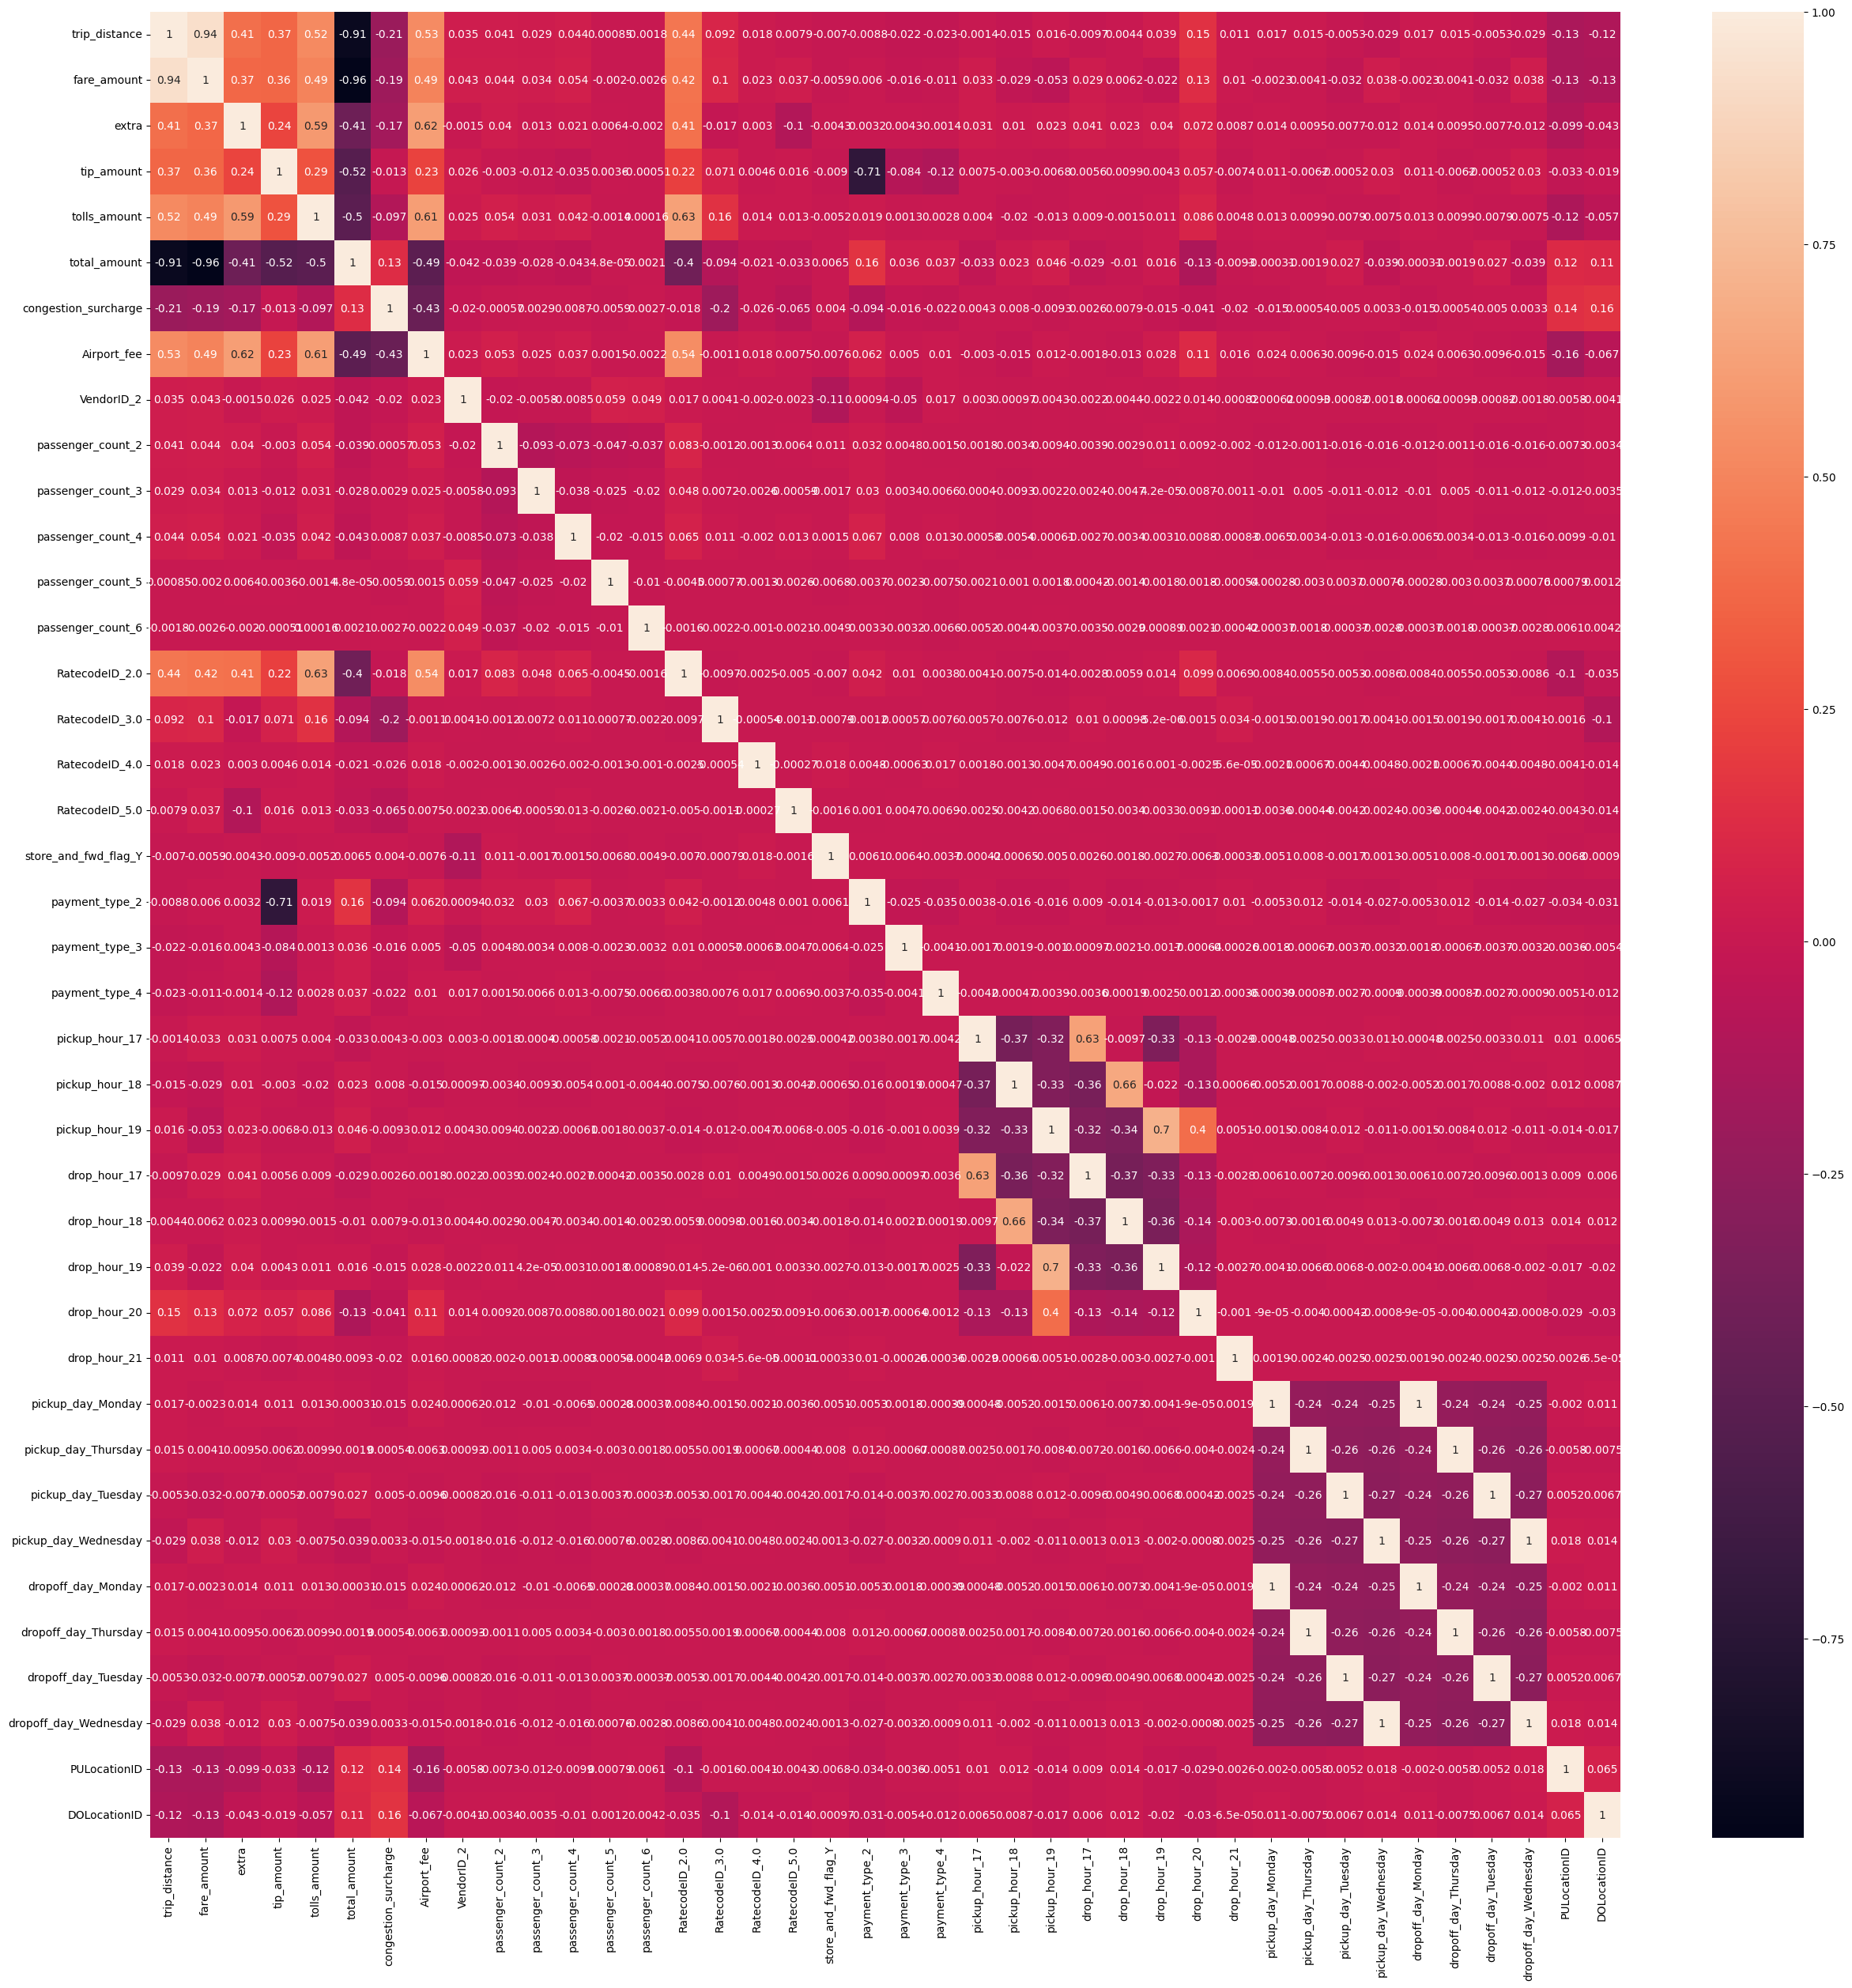

In [46]:
# Assumption : 2
# heatmap
plt.figure(figsize = (30,30))
sns.heatmap(adf.corr(), annot = True)
plt.show()

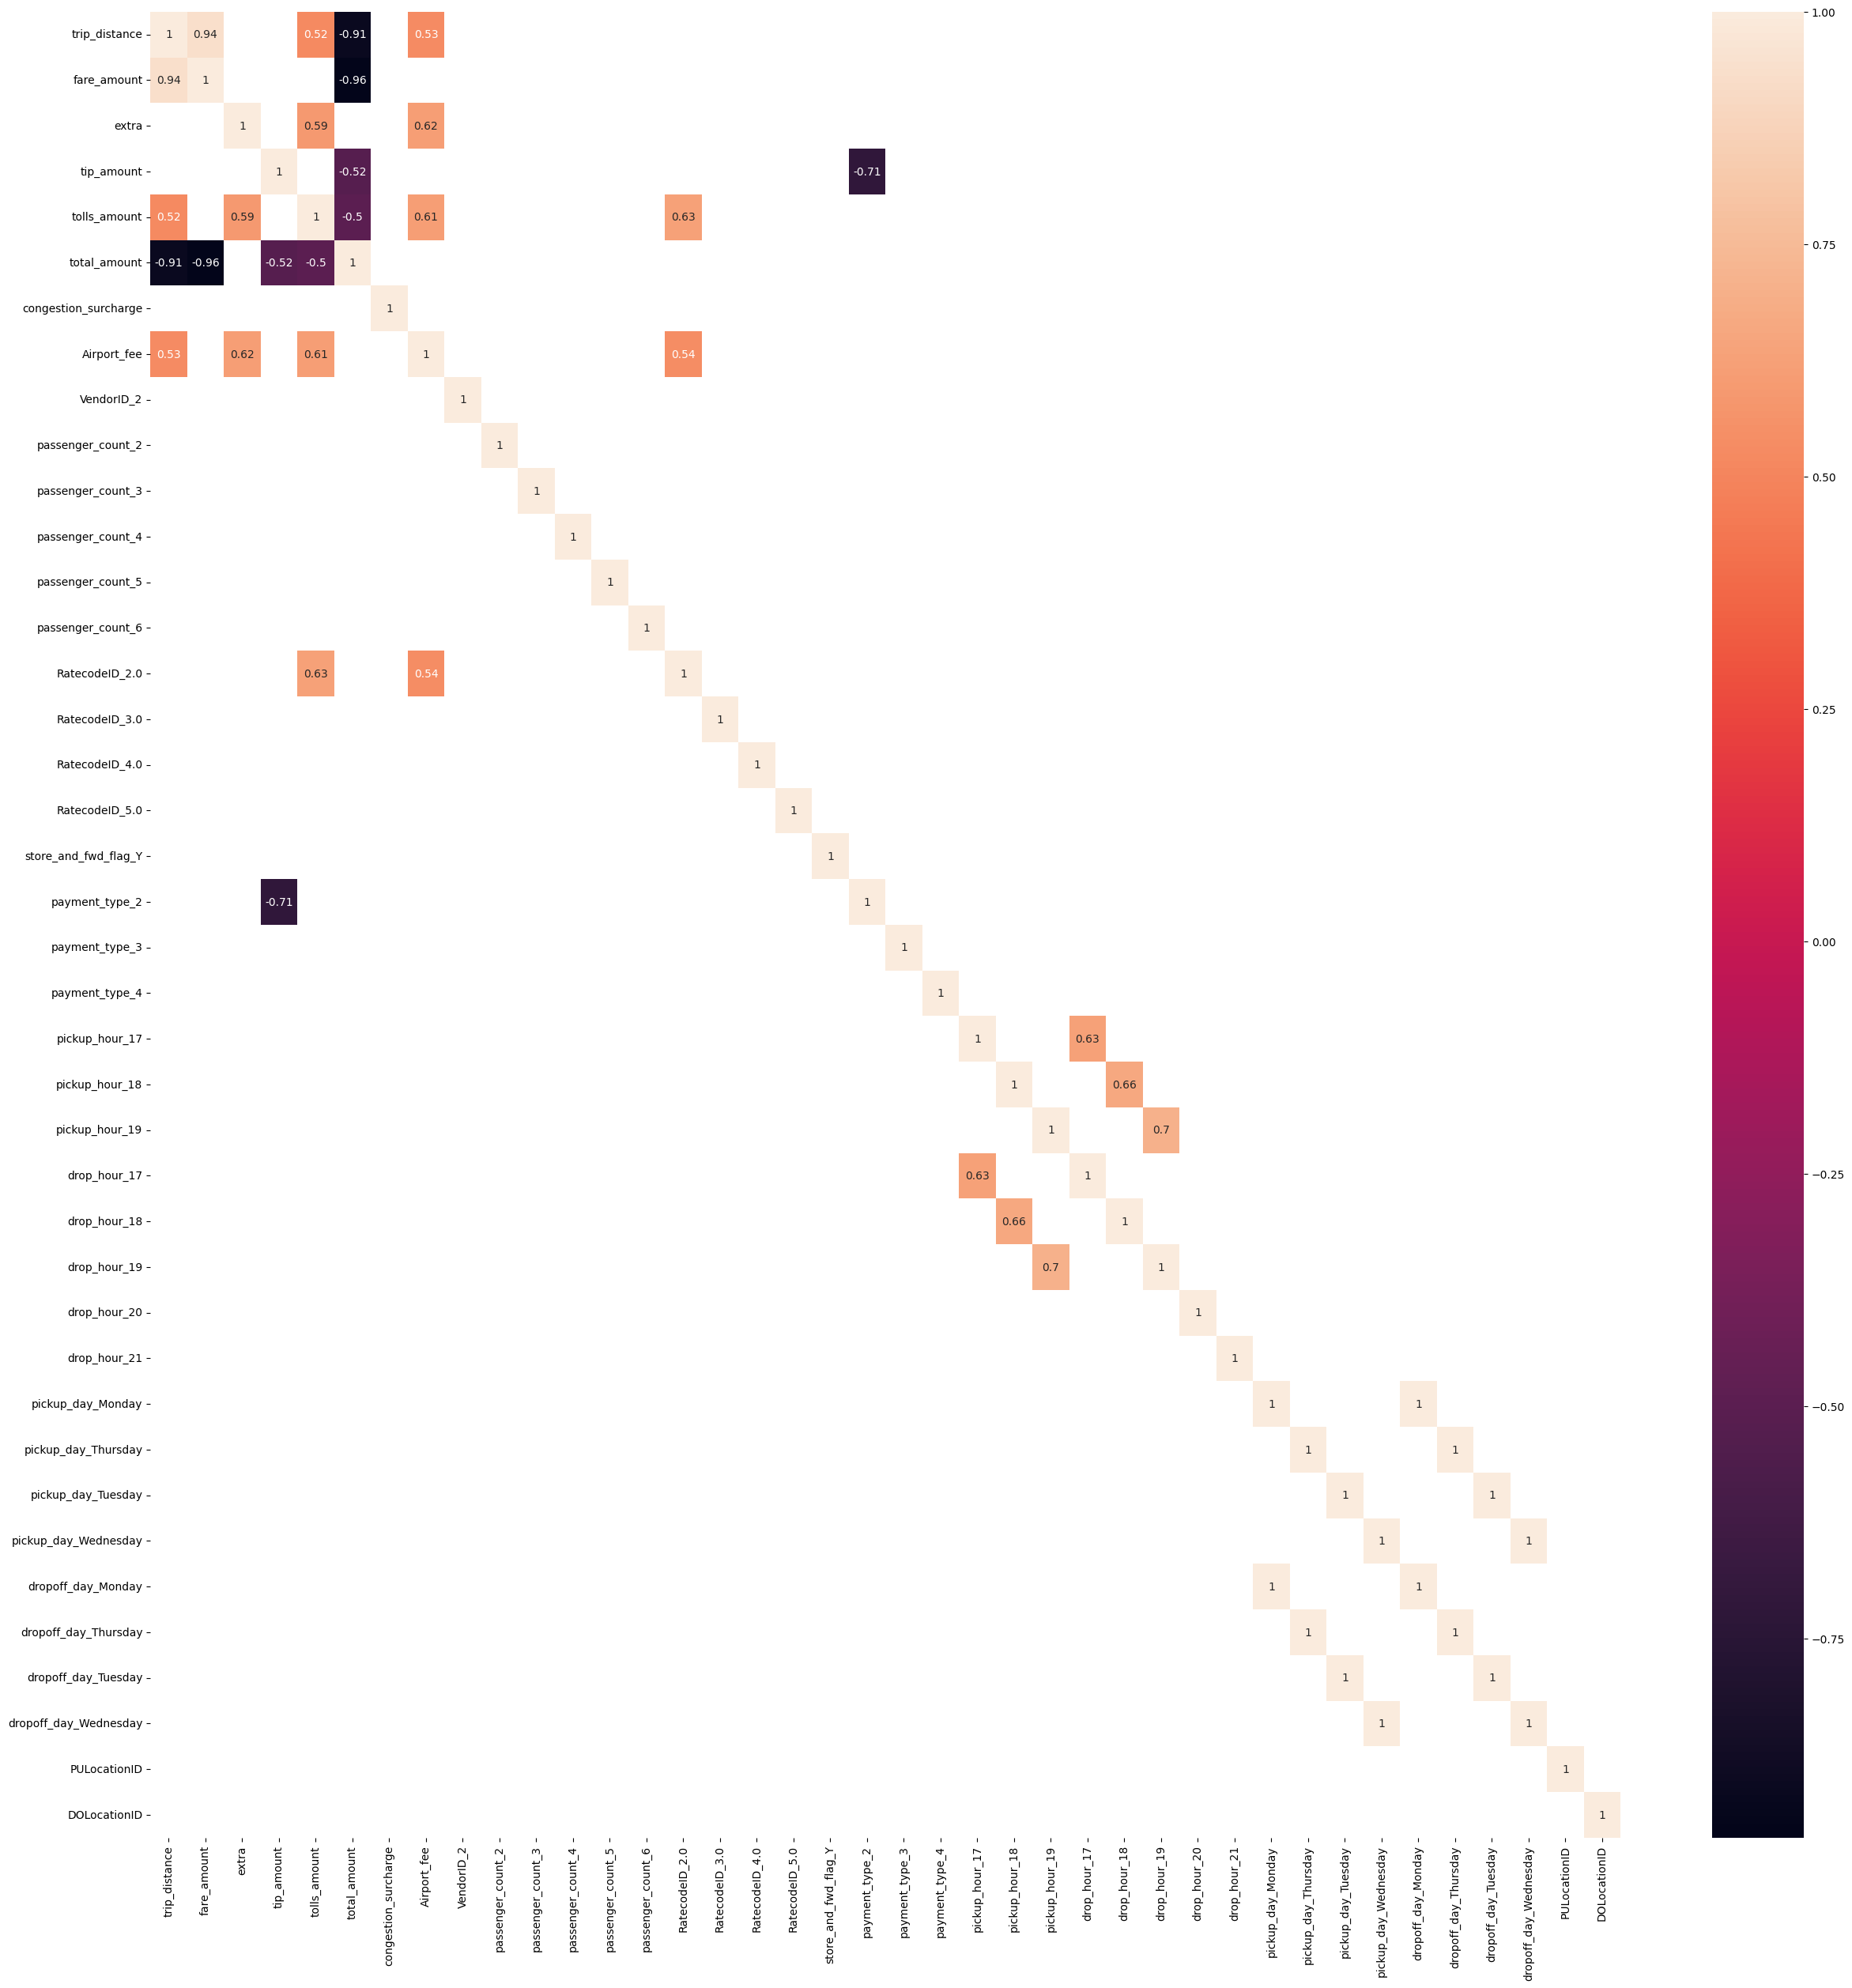

In [47]:
# filter the correlation above 0.5
plt.figure(figsize = (30,30))
sns.heatmap(adf.corr()[(adf.corr()>0.5)|(adf.corr()<-0.5)], annot = True)
plt.show()

In [48]:
# the following pair of variables have high positive correlation 
# fare_amt, tolls_amt, ratecodeid_2, total_amt vs trip_distance
# tolls_amt, ratecodeid_2, total_amount, airport_fee vs fare_amt
# tolls_amt, total_amt, airport_fee vs extra
# tip_amt, tolls_amt, airport_fee vs total_amt
# pickup_hour 17,18,19 vs drophour 17,18,19
# pickup_day_wednesday, monday, thursday, tuesday vs dropoff_day_wednesday, monday, thursday, tuesday

In [49]:
# based on the correlation values, lets drop the following columns
# tolls, airport_fee
adf.drop(columns = ['fare_amount', 'tolls_amount', 'RatecodeID_2.0','total_amount', 
                    'Airport_fee', 'tip_amount', 'extra','drop_hour_17', 'drop_hour_18', 
                    'drop_hour_19', 'dropoff_day_Monday', 'dropoff_day_Tuesday', 'payment_type_2',
                    'dropoff_day_Wednesday', 'dropoff_day_Thursday' ], inplace = True)

In [50]:
adf['PULocationID'] = adf['PULocationID'].astype('int')
adf['DOLocationID'] = adf['DOLocationID'].astype('int')

In [51]:
# variance inflation factor
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

for ind in range(len(adf.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(adf.values, i) for i in range(adf.shape[1])]
    vif["Features"] = adf.columns
    multi = vif[vif['VIF_Factor'] > 5]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
       
    if (df_sorted.empty == False):
        adf = adf.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor              Features
0     1.091938         trip_distance
1     1.102472  congestion_surcharge
2     3.303418            VendorID_2
3     1.181230     passenger_count_2
4     1.056346     passenger_count_3
5     1.037588     passenger_count_4
6     1.020059     passenger_count_5
7     1.012754     passenger_count_6
8     1.048577        RatecodeID_3.0
9     1.001734        RatecodeID_4.0
10    1.005408        RatecodeID_5.0
11    1.013438  store_and_fwd_flag_Y
12    1.005228        payment_type_3
13    1.007859        payment_type_4
14    1.856742        pickup_hour_17
15    1.872846        pickup_hour_18
16    1.953353        pickup_hour_19
17    1.276543          drop_hour_20
18    1.001587          drop_hour_21
19    1.682629     pickup_day_Monday
20    1.738228   pickup_day_Thursday
21    1.789185    pickup_day_Tuesday
22    1.821153  pickup_day_Wednesday
23    4.766589          DOLocationID


In [52]:
# using correlation matrix and vif, columns with multicollinearity has been removed.
# second assumption has been taken care.

In [56]:
adf['DOLocationID'] = adf['DOLocationID'].astype('object')

In [57]:
# Split the train and test dataset
X = adf.copy()
y = target.copy()

# add constant
X = sm.add_constant(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (105612, 25)
X_test (26403, 25)
y_train (105612,)
y_test (26403,)


In [59]:
# target encoding of variables of train dataset
TE = TargetEncoder(cols = ['DOLocationID'])
te_xtrain = TE.fit_transform(X_train[['DOLocationID']],y_train).reset_index(drop=True)
X_train = X_train.drop(columns = ['DOLocationID'])
X_train = X_train.reset_index(drop=True)
Xtrain = pd.concat((X_train,te_xtrain), axis = 1)
Xtrain.head()

,const,trip_distance,congestion_surcharge,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,DOLocationID
0,1.0,-0.367092,0.235269,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2.331989
1,1.0,-0.203401,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.189888
2,1.0,-0.971206,0.235269,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2.679068
3,1.0,1.665516,0.235269,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.436836
4,1.0,-0.303621,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.679068


In [60]:
# target encoding of variables of test dataset
TE = TargetEncoder(cols = ['DOLocationID'])
te_xtest = TE.fit_transform(X_test[['DOLocationID']],y_test).reset_index(drop=True)
X_test = X_test.drop(columns = ['DOLocationID'] )
X_test = X_test.reset_index(drop=True)
Xtest = pd.concat((X_test,te_xtest), axis = 1)
Xtest.head()

,const,trip_distance,congestion_surcharge,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,DOLocationID
0,1.0,-0.395565,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2.481217
1,1.0,0.288395,0.235269,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.213507
2,1.0,0.530202,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.355451
3,1.0,0.112204,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.711153
4,1.0,-0.385985,0.235269,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.432923


In [61]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [62]:
# Linear Regression model
basemodel1 = sm.OLS(y_train, Xtrain).fit()

print(basemodel1.summary())

                            OLS Regression Results                            
Dep. Variable:     trip_duration_mins   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:05:49   Log-Likelihood:                -28570.
No. Observations:              105612   AIC:                         5.719e+04
Df Residuals:                  105587   BIC:                         5.743e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0093 

In [63]:
# Assumptions after model building
# 3 : Linear relationship between fitted and residuals
# 4 : No auto-correlation
# 5 : No Heteroscedasticity
# 6 : Normality amond residuals

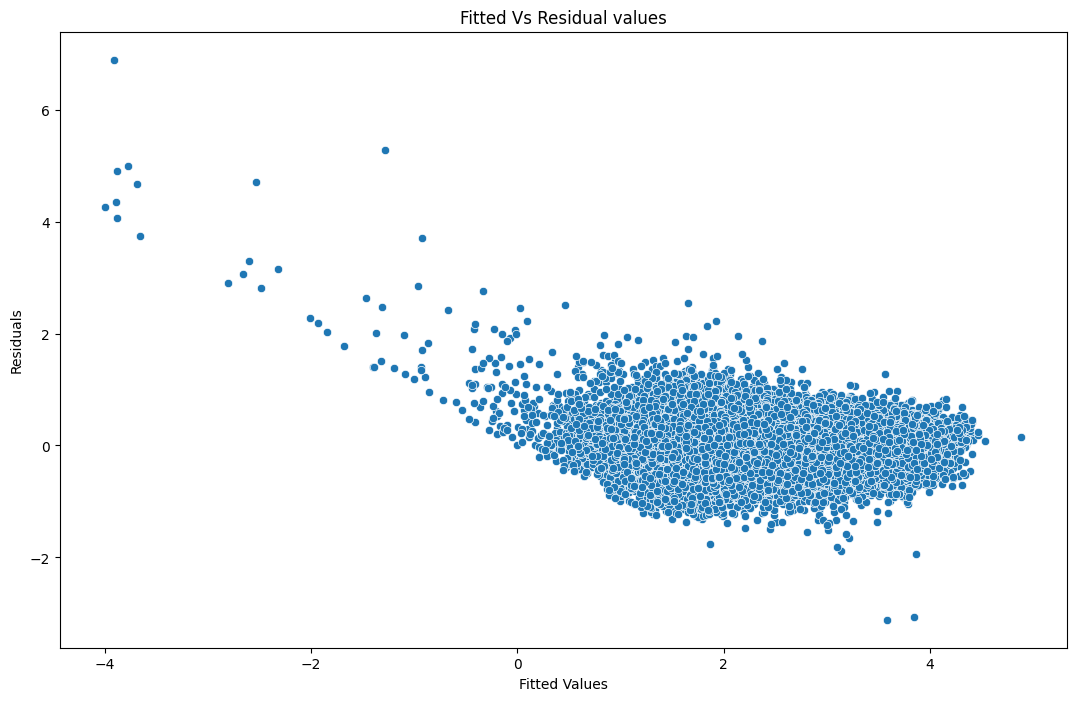

In [64]:
# Assumption 3 : Linear relationship between fitted and residuals
plt.figure(figsize = (13,8))
sns.scatterplot(x = basemodel1.fittedvalues, y = basemodel1.resid)
plt.title('Fitted Vs Residual values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [65]:
# the above plot confirms that there is no linear relationship between fitted and residual values.
# Assumption is not satisfied.

In [66]:
# Assumption 4 : No auto-correlation
# Based on the durbin-watson statistic from the model summary, we can confirm that there is no auto correlation.
# Assumption is satisfied.

In [67]:
# Assumption 5 : No Heteroscedasticity
# based on the fitted vs residual plot, funnel shape is clearly visible connfirming heteroskedasticity.
# Additionally, statistical testing can be done.
Ho = 'Homoskedasticity is present'
Ha = 'Heteroskedasticity is present'

hprob = sms.het_breuschpagan(resid = basemodel1.resid, exog_het = basemodel1.model.exog, robust = True)

if hprob[3] < 0.5:
    print(f'Rejecting null Hypothesis. Thus, {Ha}')
else:
    print(f'Failing to reject null hypothesis. Thus, {Ho}')

Rejecting null Hypothesis. Thus, Heteroskedasticity is present


In [68]:
# based on the test, we can confirm that Heteroskedasticity is present
# Assumption is not satisfied

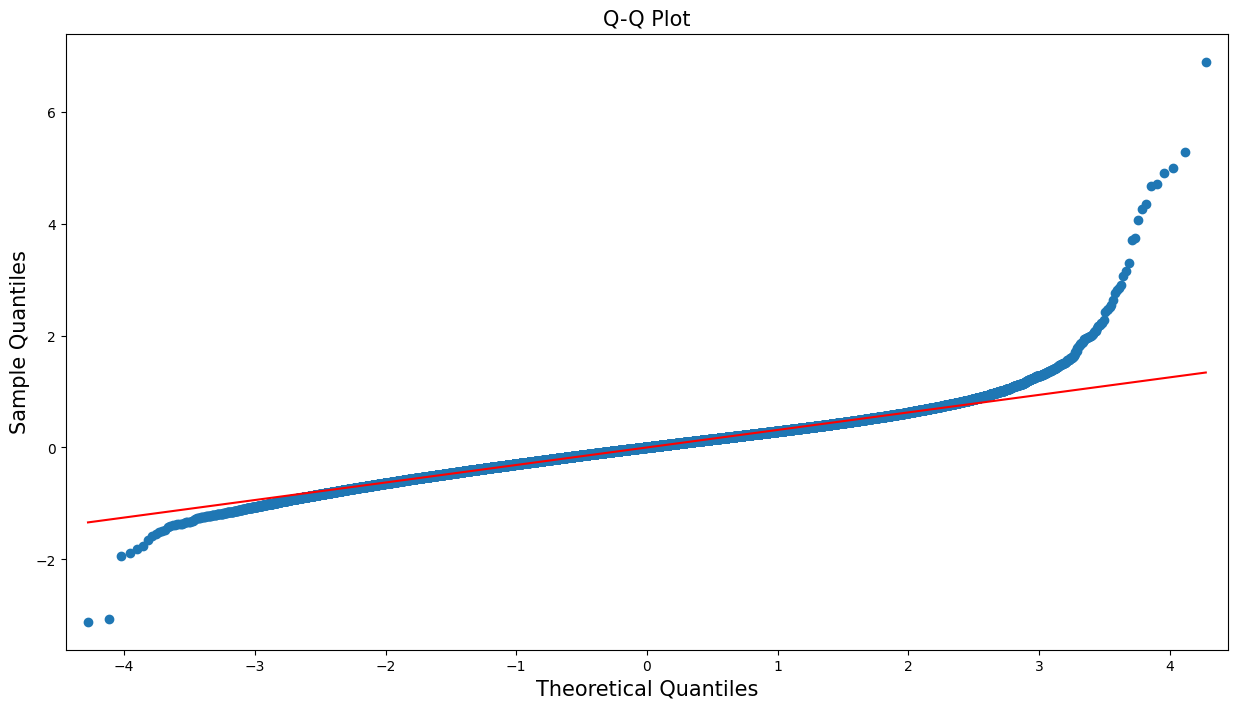

In [69]:
# Assumption 6 : Normality
# qqplot
plt.rcParams['figure.figsize'] = [15,8]

sm.qqplot(basemodel1.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

In [70]:
# since, few data does not lie close to the the diagonal, we can confirm that the residuals does not follow normal distribution.
# Additonally, based on the jarque-bera test results from the summary, p-value is less than 0.5, thus rejecting null Hypothesis.
# Confirms that the residuals does not follow normal distribution
# Assumption is not satisfied.

In [71]:
# Linear relationship between fitted and residual values
# No Heteroskedasticity
# Normality among residuals
# Moderate multicollinearity still exists.
# based on p-value, it can be confirmed that few insignificant variables are present in the model.
# Since the above assumptions are not satisfied, lets try another model after feature selection.

<b>Feature Selection</b>

In [107]:
# create a copy of the dataframe
bdf = ddf.copy()

bdf.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,PULocationID,DOLocationID
0,-0.269078,-0.219212,-5.35649,-1.542640,-0.277696,1.119046,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,162,137
1,-1.021943,-1.376655,-5.35649,-1.542640,-0.277696,2.809396,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,43,230
2,0.071343,0.234288,-5.35649,-1.542640,-0.277696,0.448273,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,75,237
3,0.134773,-0.219212,-5.35649,-0.570864,-0.277696,0.898182,0.235269,-0.292141,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,238,166
4,0.235023,0.156908,-5.35649,-0.570864,-0.277696,0.402157,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,229,234


In [108]:
# Split the train and test dataset
X = bdf.copy()
y = target.copy()

# add constant
X = sm.add_constant(X)

# train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("X_train", X_train1.shape)
print("X_test", X_test1.shape)
print("y_train", y_train1.shape)
print("y_test", y_test1.shape)

X_train (105612, 41)
X_test (26403, 41)
y_train (105612,)
y_test (26403,)


In [111]:
# target encoding of variables of train dataset
TE = TargetEncoder(cols = ['PULocationID','DOLocationID'])
te_xtrain1 = TE.fit_transform(X_train1[['PULocationID','DOLocationID']],y_train1).reset_index(drop=True)
X_train1 = X_train1.drop(columns = ['PULocationID','DOLocationID'])
X_train1 = X_train1.reset_index(drop=True)
Xtrain1 = pd.concat((X_train1,te_xtrain1), axis = 1)
Xtrain1.head()

,const,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,PULocationID,DOLocationID
0,1.0,-0.367092,-0.604060,-0.164693,0.184826,-0.277696,0.438933,0.235269,-0.292141,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,2.287150,2.331989
1,1.0,-0.203401,-0.604060,-0.164693,-0.101264,-0.277696,0.595843,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2.187920,2.189888
2,1.0,-0.971206,-0.604060,-0.164693,0.184826,-0.277696,0.438933,0.235269,-0.292141,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,2.586967,2.679068
3,1.0,1.665516,1.592328,3.635966,1.553347,-0.277696,-1.657316,0.235269,-0.292141,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,2.499891,3.436836
4,1.0,-0.303621,-0.335098,-0.164693,0.259735,-0.277696,0.199462,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,2.586967,2.679068


In [112]:
# target encoding of variables of test dataset
TE = TargetEncoder(cols = ['PULocationID','DOLocationID'])
te_xtest1 = TE.fit_transform(X_test1[['PULocationID','DOLocationID']],y_test1).reset_index(drop=True)
X_test1 = X_test1.drop(columns = ['PULocationID','DOLocationID'] )
X_test1 = X_test1.reset_index(drop=True)
Xtest1 = pd.concat((X_test1,te_xtest1), axis = 1)
Xtest1.head()

,const,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,PULocationID,DOLocationID
0,1.0,-0.395565,-0.761983,-0.164693,-0.570864,-0.277696,0.961560,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2.442584,2.481217
1,1.0,0.288395,0.306512,-0.164693,0.495774,-0.277696,-0.398168,0.235269,-0.292141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.295958,2.213507
2,1.0,0.530202,0.607124,-0.164693,-1.542640,-0.277696,-0.324165,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2.363685,2.355451
3,1.0,0.112204,0.234288,-0.164693,-1.542640,-0.277696,0.103482,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,2.597176,2.711153
4,1.0,-0.385985,-0.335098,-0.164693,0.259735,-0.277696,0.199462,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.449855,2.432923


In [ ]:
y_train1 = y_train1.reset_index(drop=True)
y_test1 = y_test1.reset_index(drop=True)

In [113]:
# Forward Feature Selection of Linear Regression
lr = LinearRegression()

lr_forward = sfs(estimator=lr, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

sfs_lr_forward = lr_forward.fit(X_train1.iloc[:,1:], y_train1)


[2023-10-15 02:20:11] Features: 1/38 -- score: 0.9312884686412856
[2023-10-15 02:20:15] Features: 2/38 -- score: 0.9401636211825334
[2023-10-15 02:20:19] Features: 3/38 -- score: 0.9418262379832996
[2023-10-15 02:20:24] Features: 4/38 -- score: 0.9434508767702672
[2023-10-15 02:20:30] Features: 5/38 -- score: 0.9447041333461396
[2023-10-15 02:20:39] Features: 6/38 -- score: 0.9458419731333441
[2023-10-15 02:20:48] Features: 7/38 -- score: 0.9467422055811502
[2023-10-15 02:20:56] Features: 8/38 -- score: 0.9472394302489254
[2023-10-15 02:21:05] Features: 9/38 -- score: 0.9477526182302825
[2023-10-15 02:21:12] Features: 10/38 -- score: 0.9483864046145916
[2023-10-15 02:21:21] Features: 11/38 -- score: 0.9488624776260419
[2023-10-15 02:21:29] Features: 12/38 -- score: 0.9491307611020317
[2023-10-15 02:21:39] Features: 13/38 -- score: 0.949295703297518
[2023-10-15 02:21:49] Features: 14/38 -- score: 0.9494438360925243
[2023-10-15 02:21:59] Features: 15/38 -- score: 0.9495947571270211
[202

In [114]:
# print the selected feature names
print('Features selelected using forward selection are: ')
print(sfs_lr_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_lr_forward.k_score_)

Features selelected using forward selection are: 
('trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'VendorID_2', 'passenger_count_3', 'passenger_count_4', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'store_and_fwd_flag_Y', 'payment_type_2', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'drop_hour_17', 'drop_hour_18', 'drop_hour_19', 'drop_hour_20', 'drop_hour_21', 'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday', 'dropoff_day_Monday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday', 'dropoff_day_Wednesday')

R-Squared:  0.9505735023819282


In [115]:
bdf = bdf[['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'VendorID_2', 'passenger_count_3', 'passenger_count_4', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'store_and_fwd_flag_Y', 'payment_type_2', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'drop_hour_17', 'drop_hour_18', 'drop_hour_19', 'drop_hour_20', 'drop_hour_21', 'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday', 'dropoff_day_Monday', 'dropoff_day_Thursday', 'dropoff_day_Tuesday', 'dropoff_day_Wednesday']]

bdf.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_3,passenger_count_4,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday
0,-0.269078,-0.219212,-5.35649,-1.542640,-0.277696,1.119046,0.235269,-0.292141,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,-1.021943,-1.376655,-5.35649,-1.542640,-0.277696,2.809396,0.235269,-0.292141,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.071343,0.234288,-5.35649,-1.542640,-0.277696,0.448273,0.235269,-0.292141,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.134773,-0.219212,-5.35649,-0.570864,-0.277696,0.898182,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.235023,0.156908,-5.35649,-0.570864,-0.277696,0.402157,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_distance          132015 non-null  float64
 1   fare_amount            132015 non-null  float64
 2   extra                  132015 non-null  float64
 3   tip_amount             132015 non-null  float64
 4   tolls_amount           132015 non-null  float64
 5   total_amount           132015 non-null  float64
 6   congestion_surcharge   132015 non-null  float64
 7   Airport_fee            132015 non-null  float64
 8   VendorID_2             132015 non-null  uint8  
 9   passenger_count_3      132015 non-null  uint8  
 10  passenger_count_4      132015 non-null  uint8  
 11  RatecodeID_2.0         132015 non-null  uint8  
 12  RatecodeID_3.0         132015 non-null  uint8  
 13  RatecodeID_4.0         132015 non-null  uint8  
 14  RatecodeID_5.0         132015 non-nu

In [117]:
# Assumptions to be satisfied before model building
# 1 - target variable should be numeric
# 2 - multicollinearity - corr matrix, heatmap, variance inflation factor

In [118]:
# Assumption : 1
target.dtype

# since the target variable is float64, it can be confirmed that the target variable is numeric and 
# first assumption is satisfied

dtype('float64')

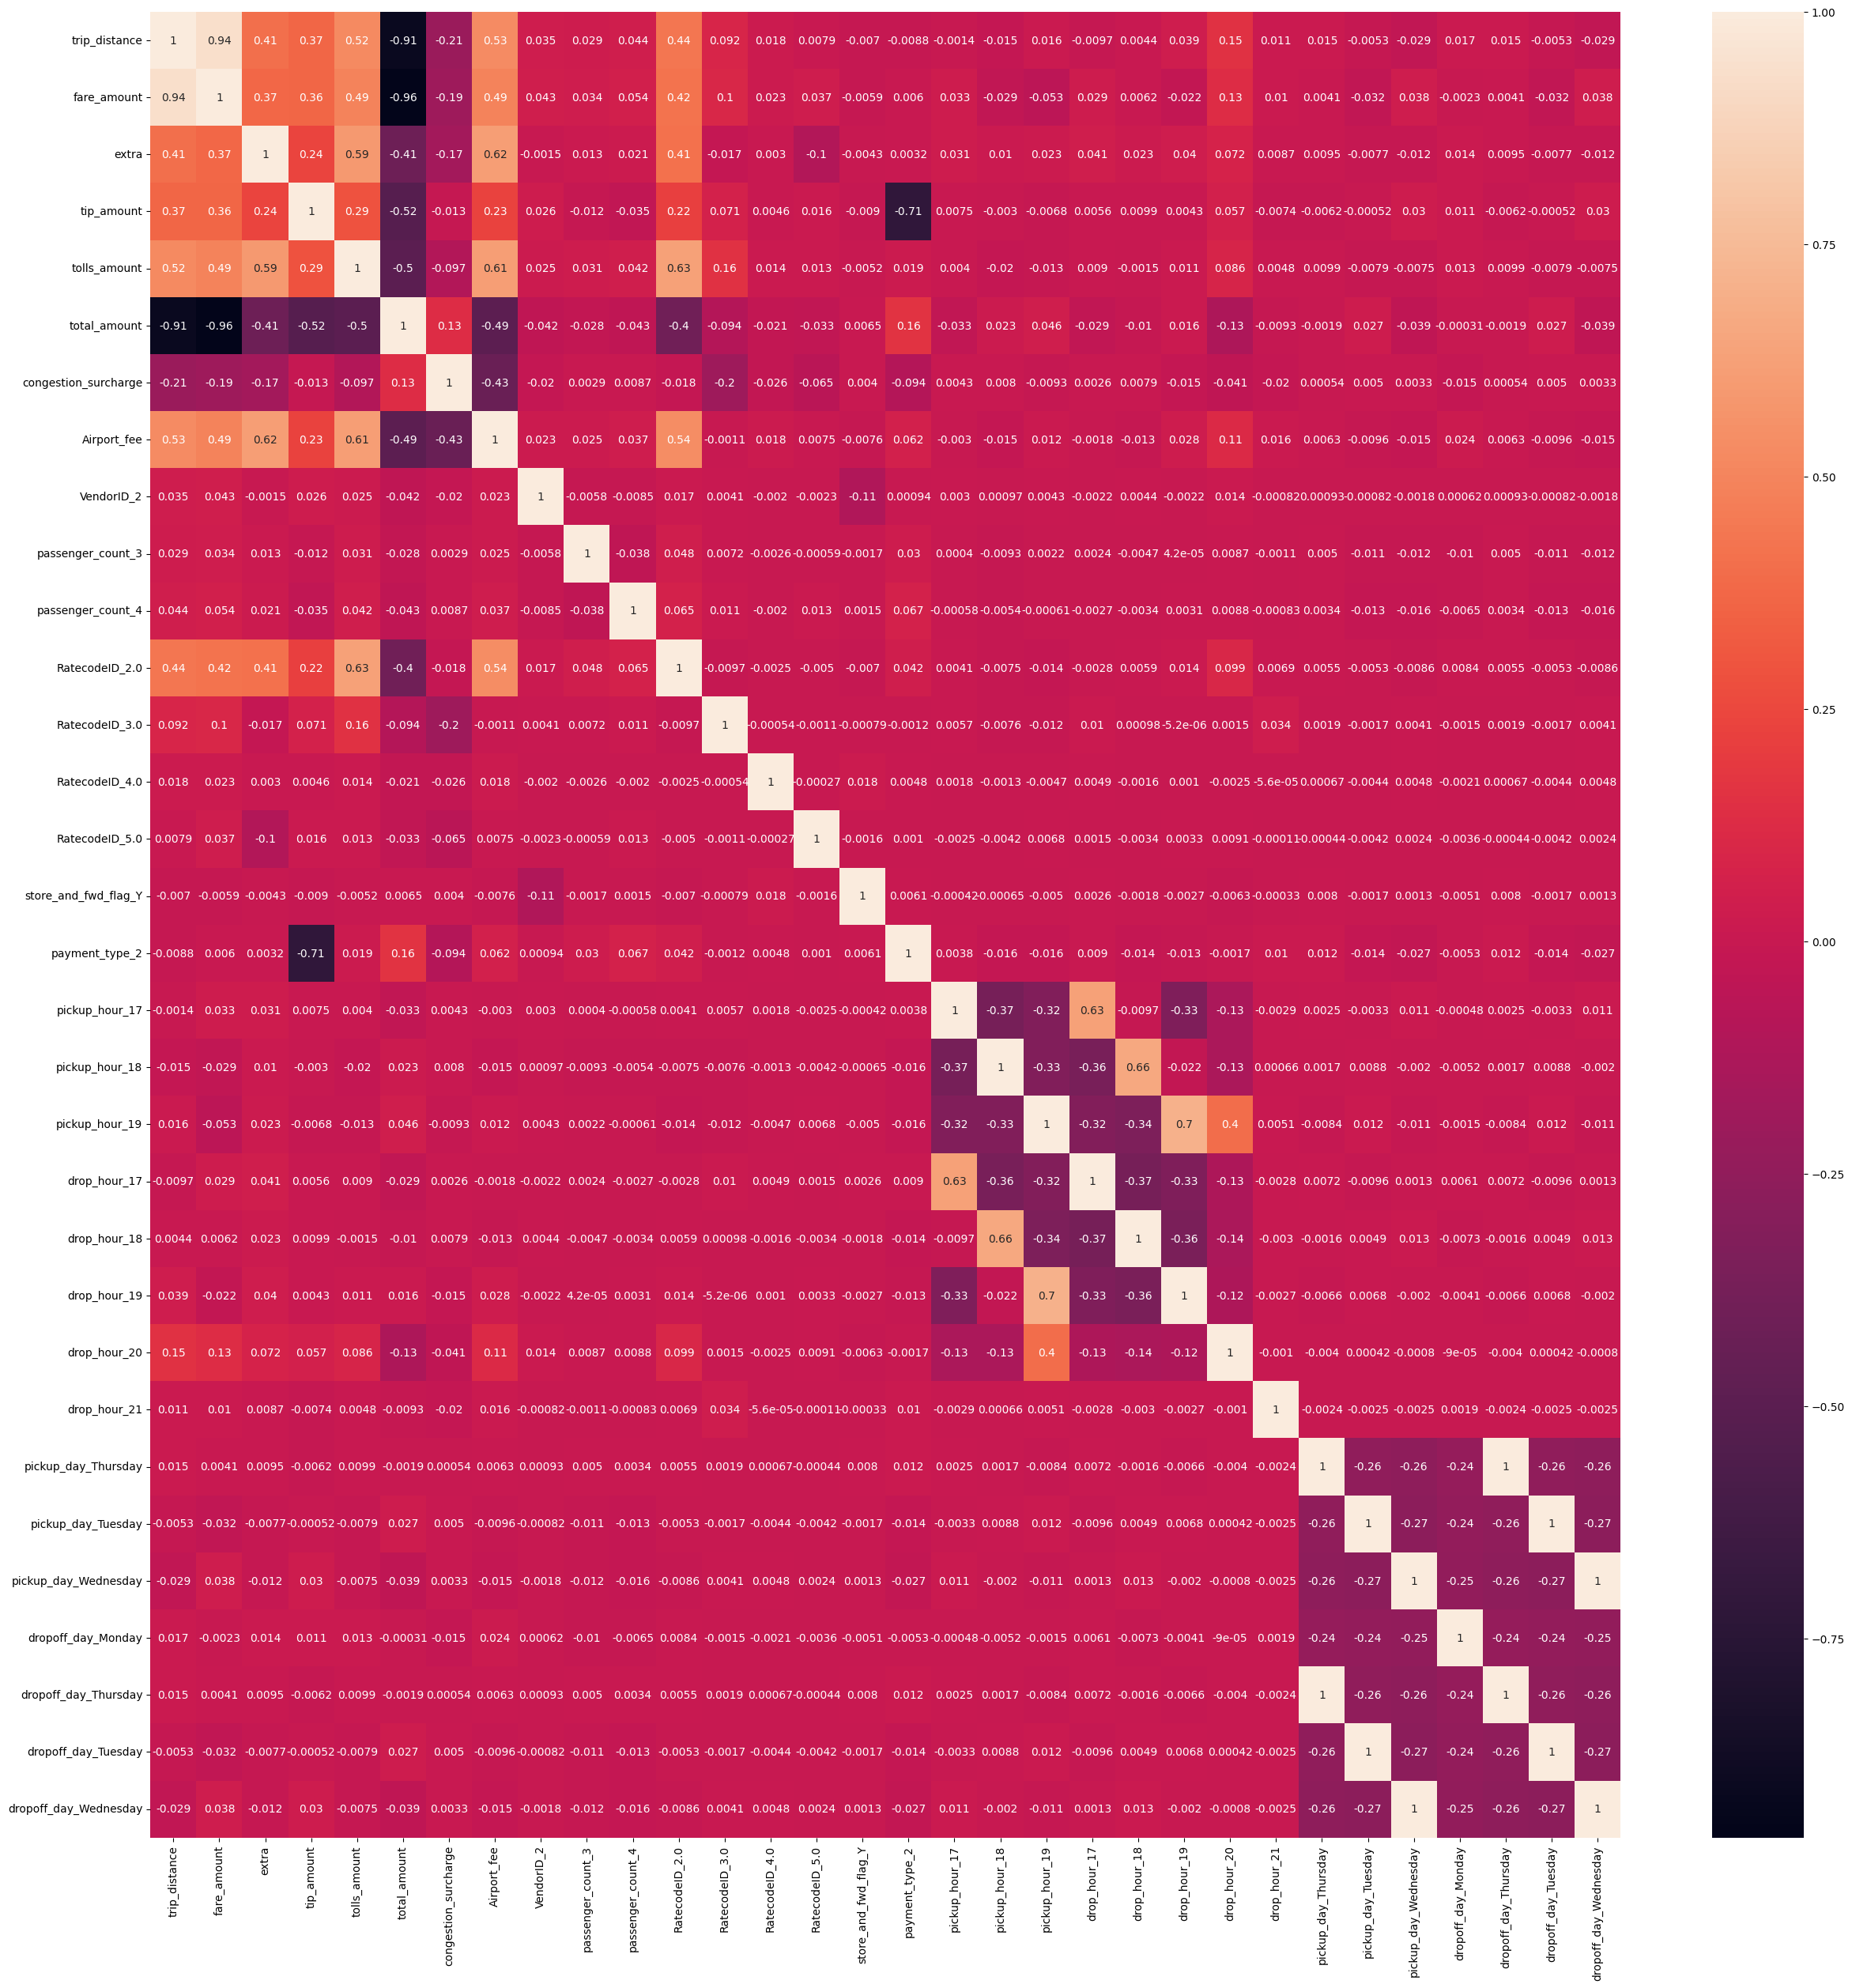

In [119]:
# Assumption : 2
# heatmap
plt.figure(figsize = (30,30))
sns.heatmap(bdf.corr(), annot = True)
plt.show()

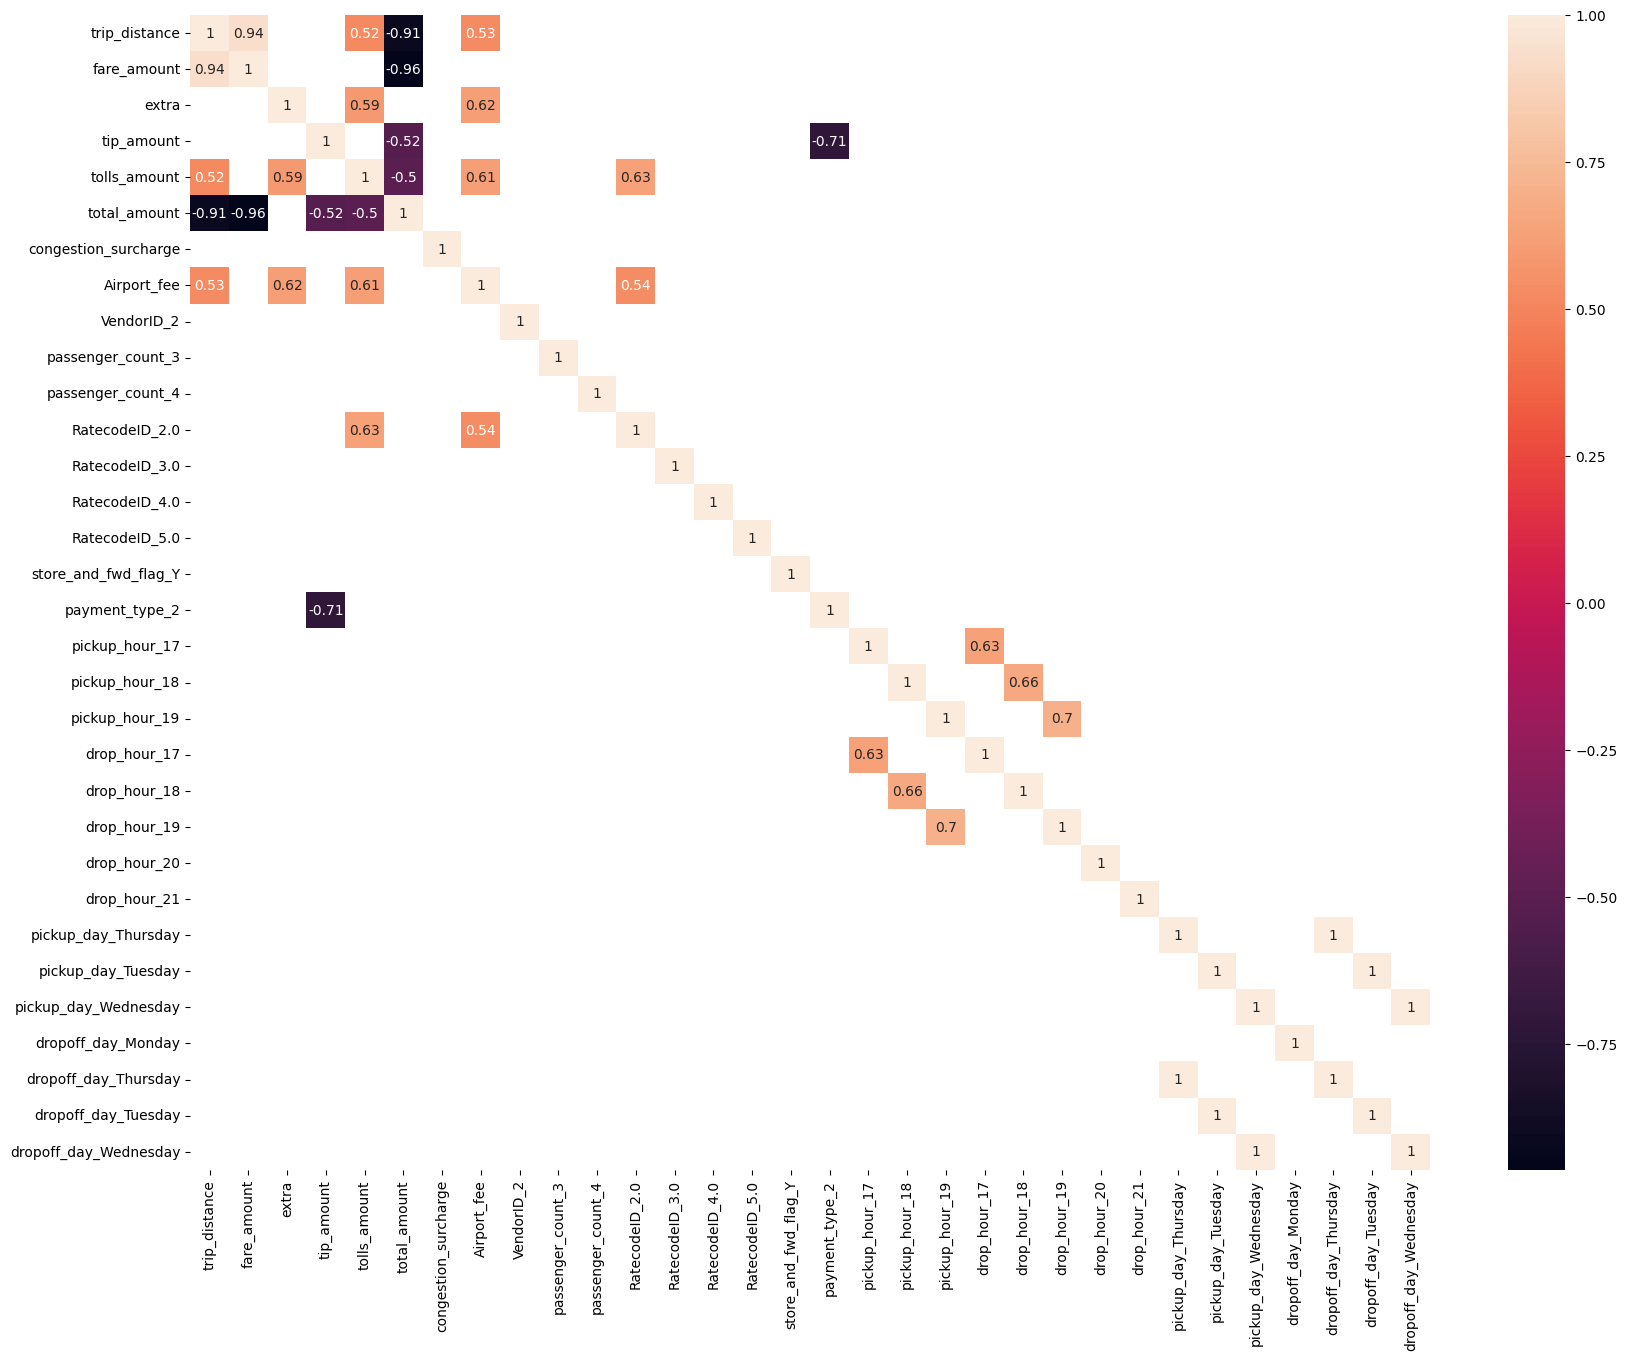

In [120]:
# filter the correlation above 0.5
plt.figure(figsize = (20,15))
sns.heatmap(bdf.corr()[(bdf.corr()>0.5)|(bdf.corr()<-0.5)], annot = True)
plt.show()

In [121]:
# variance inflation factor
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

for ind in range(len(bdf.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(bdf.values, i) for i in range(bdf.shape[1])]
    vif["Features"] = bdf.columns
    multi = vif[vif['VIF_Factor'] > 5]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
       
    if (df_sorted.empty == False):
        bdf = bdf.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor               Features
0     1.758370          trip_distance
1     1.921942                  extra
2     2.883248             tip_amount
3     2.574672           tolls_amount
4     1.482537   congestion_surcharge
5     2.856787            Airport_fee
6     3.085931             VendorID_2
7     1.048921      passenger_count_3
8     1.039476      passenger_count_4
9     1.962472         RatecodeID_2.0
10    1.153077         RatecodeID_3.0
11    1.001986         RatecodeID_4.0
12    1.030644         RatecodeID_5.0
13    1.012271   store_and_fwd_flag_Y
14    2.923815         payment_type_2
15    3.422995         pickup_hour_17
16    3.481787         pickup_hour_18
17    1.955535         pickup_hour_19
18    3.208877           drop_hour_17
19    3.775268           drop_hour_18
20    1.281189           drop_hour_20
21    1.002010           drop_hour_21
22    1.568746     dropoff_day_Monday
23    1.628784   dropoff_day_Thursday
24    1.663456    dropoff_day_Tuesday
25    1.6941

In [122]:
# from correlation matrix, it can be seen that there is no correlation among independent variables

In [123]:
# Split the train and test dataset
X = bdf.copy()
y = target.copy()

# add constant
X = sm.add_constant(X)

# train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("X_train", X_train1.shape)
print("X_test", X_test1.shape)
print("y_train", y_train1.shape)
print("y_test", y_test1.shape)

X_train (105612, 27)
X_test (26403, 27)
y_train (105612,)
y_test (26403,)


In [89]:
y_train1 = y_train1.reset_index(drop=True)
y_test1 = y_test1.reset_index(drop=True)

In [124]:
# Linear Regression model
basemodel2 = sm.OLS(y_train1, X_train1).fit()

print(basemodel2.summary())

                            OLS Regression Results                            
Dep. Variable:     trip_duration_mins   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 1.680e+04
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:31:15   Log-Likelihood:                -28387.
No. Observations:              105612   AIC:                         5.683e+04
Df Residuals:                  105585   BIC:                         5.709e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.52

In [125]:
# Assumptions after model building
# 3 : Linear relationship between fitted and residuals
# 4 : No auto-correlation
# 5 : No Heteroscedasticity
# 6 : Normality amond residuals

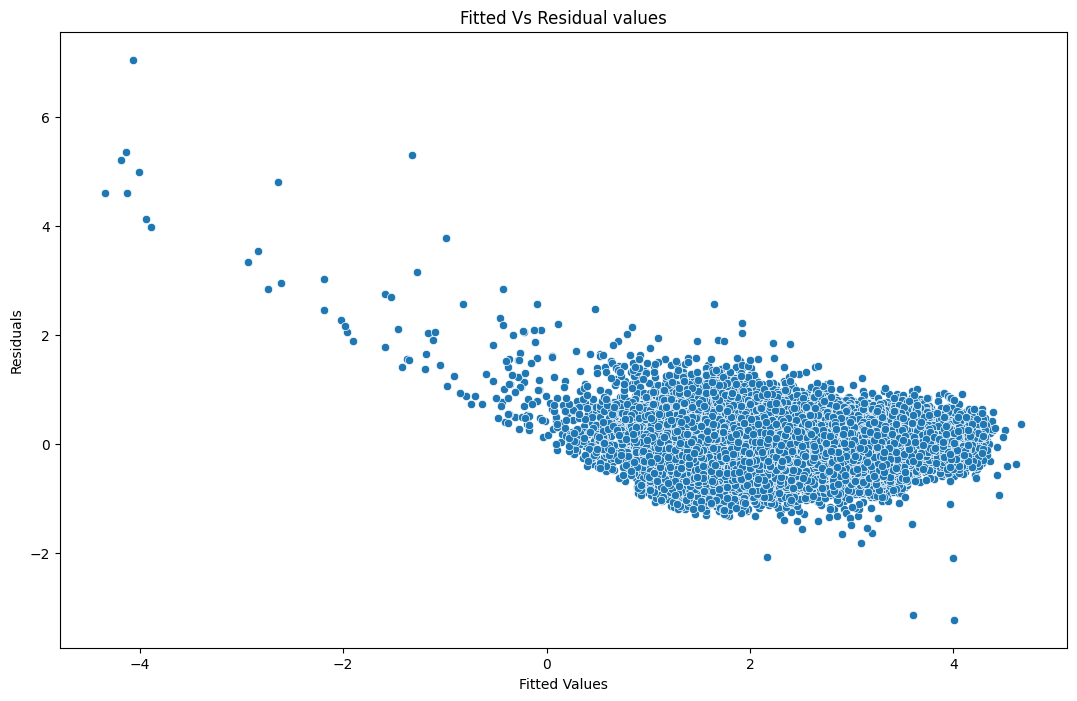

In [126]:
# Assumption 3 : Linear relationship between fitted and residuals
plt.figure(figsize = (13,8))
sns.scatterplot(x = basemodel2.fittedvalues, y = basemodel2.resid)
plt.title('Fitted Vs Residual values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [127]:
# the above plot confirms that there is no linear relationship between fitted and residual values.
# Assumption is not satisfied.

In [128]:
# Assumption 4 : No auto-correlation
# Based on the durbin-watson statistic from the model summary, we can confirm that there is no auto correlation.
# Assumption is satisfied.

In [129]:
# Assumption 5 : No Heteroscedasticity
# based on the fitted vs residual plot, funnel shape is clearly visible connfirming heteroskedasticity.
# Additionally, statistical testing can be done.
Ho = 'Homoskedasticity is present'
Ha = 'Heteroskedasticity is present'

hprob_ = sms.het_breuschpagan(resid = basemodel2.resid, exog_het = basemodel2.model.exog, robust = True)

if hprob_[3] < 0.5:
    print(f'Rejecting null Hypothesis. Thus, {Ha}')
else:
    print(f'Failing to reject null hypothesis. Thus, {Ho}')

Rejecting null Hypothesis. Thus, Heteroskedasticity is present


In [130]:
# based on the test, we can confirm that Heteroskedasticity is present
# Assumption is not satisfied

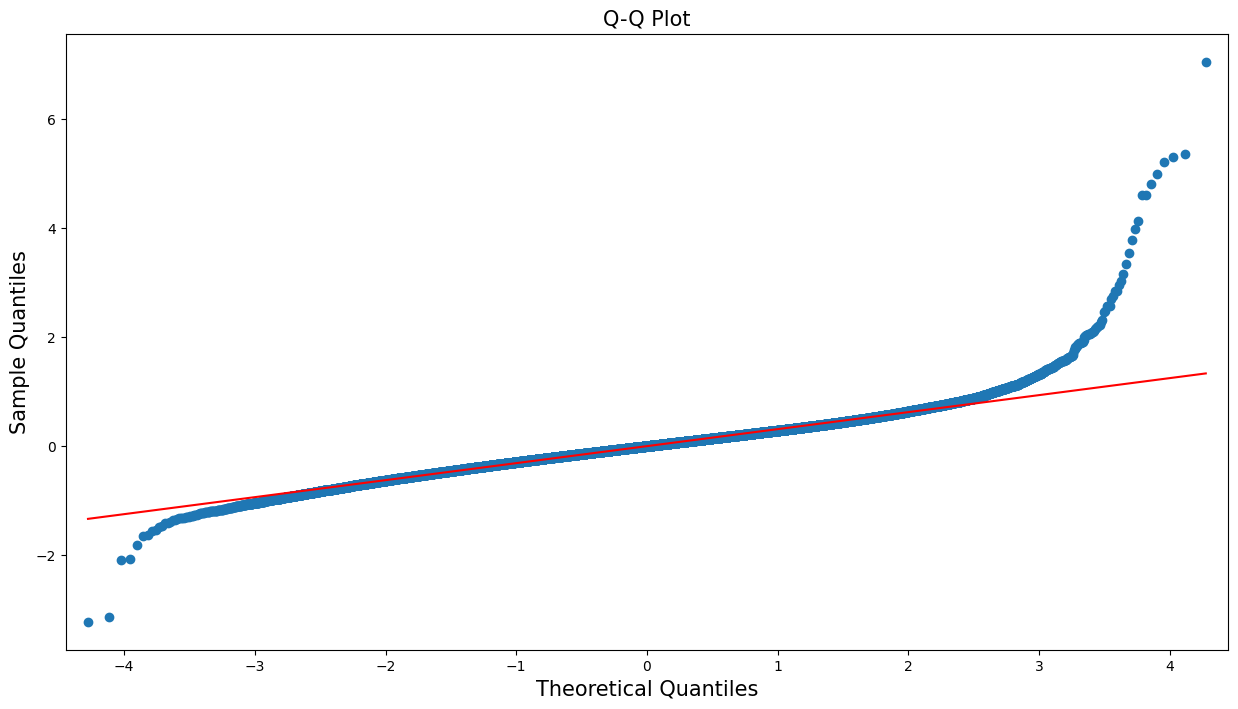

In [131]:
# Assumption 6 : Normality
# qqplot
plt.rcParams['figure.figsize'] = [15,8]

sm.qqplot(basemodel2.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

In [132]:
# since, few data does not lie close to the the diagonal, we can confirm that the residuals does not follow normal distribution.
# Additonally, based on the jarque-bera test results from the summary, p-value is less than 0.5, thus rejecting null Hypothesis.
# Confirms that the residuals does not follow normal distribution
# Assumption is not satisfied.

In [133]:
# Linear relationship between fitted and residual values
# No Heteroskedasticity
# Normality among residuals
# Moderate multicollinearity is found.
# based on p-value, it can be confirmed that few insignificant variables are present in the model.
# Since the above assumptions are not satisfied, lets try lasso regularization model.

<b>Lasso Regularisation</b></br>To eliminate insignificant features and to reduce the impact of multicollinearity.

In [134]:
# create a copy of the dataframe
cdf = ddf.copy()
cdf.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,VendorID_2,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,pickup_hour_17,pickup_hour_18,pickup_hour_19,drop_hour_17,drop_hour_18,drop_hour_19,drop_hour_20,drop_hour_21,pickup_day_Monday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,PULocationID,DOLocationID
0,-0.269078,-0.219212,-5.35649,-1.542640,-0.277696,1.119046,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,162,137
1,-1.021943,-1.376655,-5.35649,-1.542640,-0.277696,2.809396,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,43,230
2,0.071343,0.234288,-5.35649,-1.542640,-0.277696,0.448273,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,75,237
3,0.134773,-0.219212,-5.35649,-0.570864,-0.277696,0.898182,0.235269,-0.292141,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,238,166
4,0.235023,0.156908,-5.35649,-0.570864,-0.277696,0.402157,0.235269,-0.292141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,229,234


In [135]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_distance          132015 non-null  float64
 1   fare_amount            132015 non-null  float64
 2   extra                  132015 non-null  float64
 3   tip_amount             132015 non-null  float64
 4   tolls_amount           132015 non-null  float64
 5   total_amount           132015 non-null  float64
 6   congestion_surcharge   132015 non-null  float64
 7   Airport_fee            132015 non-null  float64
 8   VendorID_2             132015 non-null  uint8  
 9   passenger_count_2      132015 non-null  uint8  
 10  passenger_count_3      132015 non-null  uint8  
 11  passenger_count_4      132015 non-null  uint8  
 12  passenger_count_5      132015 non-null  uint8  
 13  passenger_count_6      132015 non-null  uint8  
 14  RatecodeID_2.0         132015 non-nu

In [136]:
cdf['PULocationID'] = cdf['PULocationID'].astype('object')
cdf['DOLocationID'] = cdf['DOLocationID'].astype('object')

In [137]:
# Split the train and test dataset
X = cdf.copy()
y = target.copy()

# add constant
X = sm.add_constant(X)

# train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 10)

print("X_train", X_train2.shape)
print("X_test", X_test2.shape)
print("y_train", y_train2.shape)
print("y_test", y_test2.shape)

X_train (105612, 41)
X_test (26403, 41)
y_train (105612,)
y_test (26403,)


In [138]:
# target encoding of variables of train dataset
TE = TargetEncoder(cols = ['PULocationID','DOLocationID'])
te_xtrain2 = TE.fit_transform(X_train2[['PULocationID','DOLocationID']],y_train2).reset_index(drop=True)
X_train2 = X_train2.drop(columns = ['PULocationID','DOLocationID'])
X_train2 = X_train2.reset_index(drop=True)
Xtrain2 = pd.concat((X_train2,te_xtrain2), axis = 1)
y_train2 = y_train2.reset_index(drop=True)


# target encoding of variables of test dataset
TE = TargetEncoder(cols = ['PULocationID','DOLocationID'])
te_xtest2 = TE.fit_transform(X_test2[['PULocationID','DOLocationID']],y_test2).reset_index(drop=True)
X_test2 = X_test2.drop(columns = ['PULocationID','DOLocationID'] )
X_test2 = X_test2.reset_index(drop=True)
Xtest2 = pd.concat((X_test2,te_xtest2), axis = 1)
y_test2 = y_test2.reset_index(drop=True)

In [139]:
# Lasso model
lrr = Lasso(alpha = 0.1, max_iter = 500, random_state = 10)

basemodel3 = lrr.fit(Xtrain2,y_train2)

In [140]:
predicted = basemodel3.predict(Xtest2)

R2 = r2_score(y_test2,predicted)
residuals = y_test2 - predicted

print('Accuracy :', R2)

Accuracy : 0.9140747599501933


In [141]:
# Assumptions after model building
# 3 : Linear relationship between fitted and residuals
# 4 : No auto-correlation
# 5 : No Heteroscedasticity
# 6 : Normality amond residuals

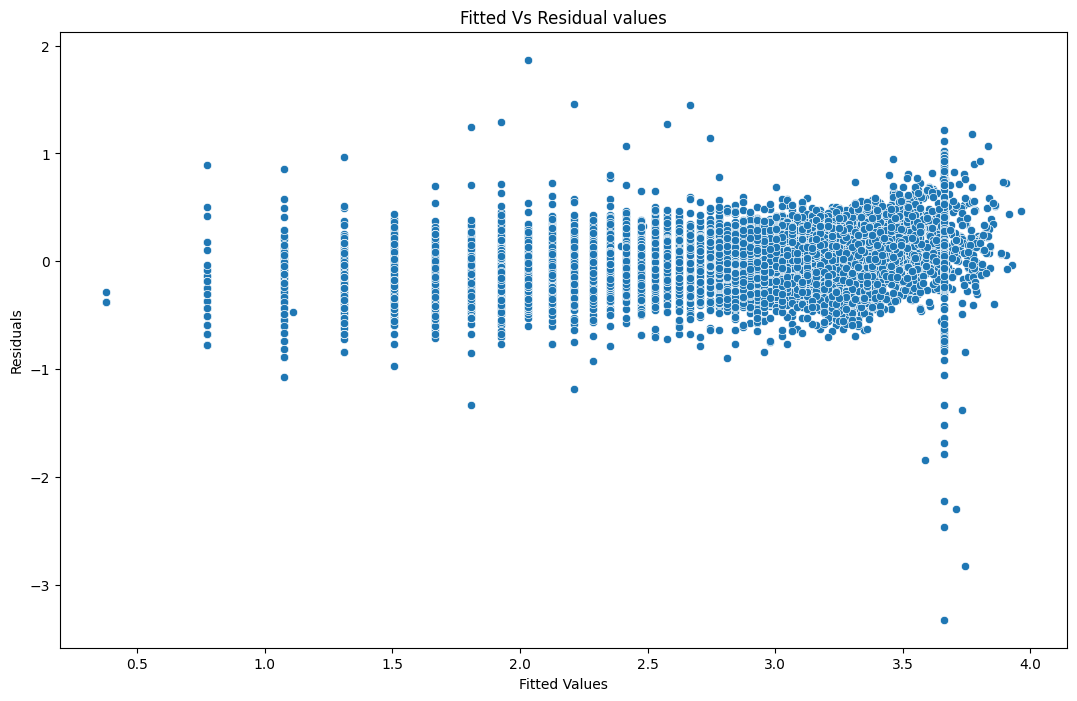

In [142]:
# Assumption 3 : Linear relationship between fitted and residuals
plt.figure(figsize = (13,8))
sns.scatterplot(x = predicted, y = residuals)
plt.title('Fitted Vs Residual values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [143]:
# the above plot confirms that there is no linear relationship between fitted and residual values.
# Assumption is not satisfied.

In [144]:
# Assumption 4 : No auto-correlation
dw_test_statistic = durbin_watson(residuals)

print("Durbin-Watson Statistic : ",dw_test_statistic)

Durbin-Watson Statistic :  1.9921278671853682


In [145]:
# Based on the durbin-watson statistic, we can confirm that there is no auto correlation.
# Assumption is satisfied.

In [146]:
# Assumption 5 : No Heteroscedasticity
# based on the fitted vs residual plot, funnel shape is clearly visible connfirming heteroskedasticity.
# Additionally, statistical testing can be done.
Ho = 'Homoskedasticity is present'
Ha = 'Heteroskedasticity is present'

hprob__ = sms.het_breuschpagan(resid = residuals, exog_het = Xtest2, robust = True)

if hprob__[3] < 0.5:
    print(f'Rejecting null Hypothesis. Thus, {Ha}')
else:
    print(f'Failing to reject null hypothesis. Thus, {Ho}')

Rejecting null Hypothesis. Thus, Heteroskedasticity is present


In [147]:
# based on the test, we can confirm that Heteroskedasticity is present
# Assumption is not satisfied

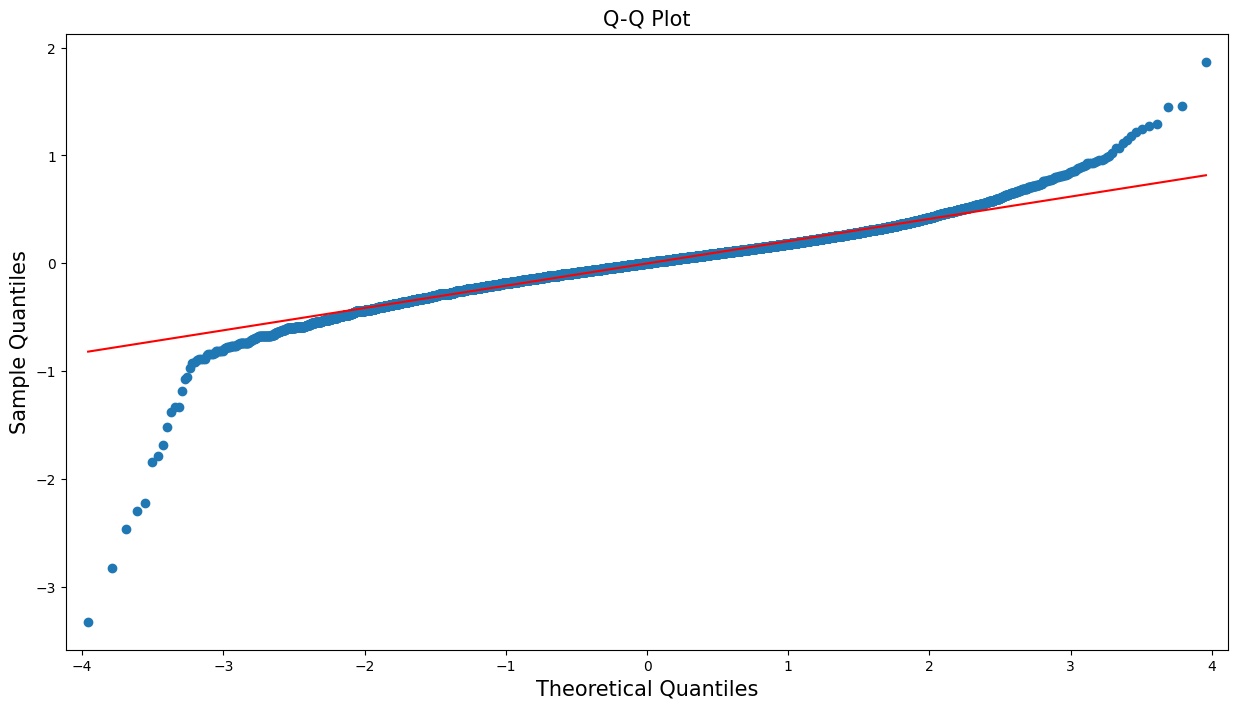

In [148]:
# Assumption 6 : Normality
# qqplot
plt.rcParams['figure.figsize'] = [15,8]

sm.qqplot(residuals, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

In [149]:
# since, few data does not lie close to the the diagonal, we can confirm that the residuals does not follow normal distribution.
# Additonally, based on the jarque-bera test results from the summary, p-value is less than 0.5, thus rejecting null Hypothesis.
# Confirms that the residuals does not follow normal distribution
# Assumption is not satisfied.

In [150]:
# Linear relationship between fitted and residual values
# No Heteroskedasticity
# Normality among residuals

# Since the above assumptions are not satisfied, even after trying multiple methods. 
# it can be confirmed that there is no linear relationship. Hence, non-linear models should be done further.

<b>Non-Linear Models with all Features</b>

In [151]:
# import the cleaned dataset
df = pd.read_csv('cleaned_taxi_dataset')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday


In [152]:
# dataframe shape
df.shape

(132015, 32)

In [153]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               132015 non-null  int64  
 1   tpep_pickup_datetime   132015 non-null  object 
 2   tpep_dropoff_datetime  132015 non-null  object 
 3   passenger_count        132015 non-null  int64  
 4   trip_distance          132015 non-null  float64
 5   RatecodeID             132015 non-null  float64
 6   store_and_fwd_flag     132015 non-null  object 
 7   PULocationID           132015 non-null  int64  
 8   DOLocationID           132015 non-null  int64  
 9   payment_type           132015 non-null  int64  
 10  fare_amount            132015 non-null  float64
 11  extra                  132015 non-null  float64
 12  mta_tax                132015 non-null  float64
 13  tip_amount             132015 non-null  float64
 14  tolls_amount           132015 non-nu

In [154]:
# date time dtype conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [155]:
# create a new feature trip_duration in mins
df['trip_duration_mins'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60, 1)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day,trip_duration_mins
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday,10.6
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday,5.1
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday,14.2
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday,9.2
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday,13.5


In [156]:
# Dtype conversion
df['VendorID'] = df['VendorID'].astype(object)
df['passenger_count'] = df['passenger_count'].astype(object)
df['RatecodeID'] = df['RatecodeID'].astype(object)
df['payment_type'] = df['payment_type'].astype(object)
df['pickup_hour'] = df['pickup_hour'].astype(object)
df['drop_hour'] = df['drop_hour'].astype(object)
df['PULocationID'] = df['PULocationID'].astype(object)
df['DOLocationID'] = df['DOLocationID'].astype(object)

In [157]:
# as it can be seen from the five point summary, mta_tax and improvement surcharge has zero standard deviation. 
# Hence, it can be removed.

# additionally, since the minute column is created, secs column can be removed as it will have strong correlation with the minutes column.

df.drop(columns = ['mta_tax', 'improvement_surcharge', 'trip_duration_secs',
                    'pickup_date', 'dropoff_date', 'tpep_pickup_datetime', 
                    'tpep_dropoff_datetime','PU_Zone', 'PU_service_zone', 
                    'DO_Zone', 'DO_service_zone', 'PU_Borough', 'DO_Borough'], inplace  = True )

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132015 non-null  object 
 1   passenger_count       132015 non-null  object 
 2   trip_distance         132015 non-null  float64
 3   RatecodeID            132015 non-null  object 
 4   store_and_fwd_flag    132015 non-null  object 
 5   PULocationID          132015 non-null  object 
 6   DOLocationID          132015 non-null  object 
 7   payment_type          132015 non-null  object 
 8   fare_amount           132015 non-null  float64
 9   extra                 132015 non-null  float64
 10  tip_amount            132015 non-null  float64
 11  tolls_amount          132015 non-null  float64
 12  total_amount          132015 non-null  float64
 13  congestion_surcharge  132015 non-null  float64
 14  Airport_fee           132015 non-null  float64
 15  

In [159]:
df.drop(index = (df[df.drop_hour == 21]).index, inplace = True)

In [160]:
# split the target and response variables
y = df['trip_duration_mins']
X = df.drop(columns = ['trip_duration_mins'])

In [161]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 132012 entries, 0 to 132014
Series name: trip_duration_mins
Non-Null Count   Dtype  
--------------   -----  
132012 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132012 entries, 0 to 132014
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132012 non-null  object 
 1   passenger_count       132012 non-null  object 
 2   trip_distance         132012 non-null  float64
 3   RatecodeID            132012 non-null  object 
 4   store_and_fwd_flag    132012 non-null  object 
 5   PULocationID          132012 non-null  object 
 6   DOLocationID          132012 non-null  object 
 7   payment_type          132012 non-null  object 
 8   fare_amount           132012 non-null  float64
 9   extra                 132012 non-null  float64
 10  tip_amount            132012 non-null  float64
 11  tolls_amount          132012 non-null  float64
 12  total_amount          132012 non-null  float64
 13  congestion_surcharge  132012 non-null  float64
 14  Airport_fee           132012 non-null  float64
 15  

In [166]:
# creating score card for the models
score_card = pd.DataFrame(columns=['MODEL','DATA','R2','MAE','MSE','RMSE','MAPE'])

def model_performance(model,yact,xtest,data,mname):
      
    predicted = model.predict(xtest)
    MAE = mean_absolute_error(yact,predicted)
    MSE = mean_squared_error(yact,predicted)
    RMSE = np.sqrt(mean_squared_error(yact,predicted))
    R2 = r2_score(yact,predicted)
    MAPE = mean_absolute_percentage_error(yact,predicted)
    global score_card
    score_card = pd.concat([score_card,pd.DataFrame({'MODEL':[mname],'DATA':[data],'R2':[R2],'MAE': [MAE], 'MSE':[MSE],'RMSE':[RMSE],'MAPE':[MAPE]})],ignore_index=True)

In [167]:
# creating a function for preprocessing the train and test data separately
def preprocessing_df(data,y):
    ss=StandardScaler()
    numeric_ind = data.select_dtypes(include='number')
    scaled = ss.fit_transform(numeric_ind)
    scaled_num = pd.DataFrame(scaled,columns=numeric_ind.columns)

    
    TE= TargetEncoder(cols=['PULocationID','DOLocationID'])
    tencod = TE.fit_transform(data[['PULocationID','DOLocationID']],y).reset_index(drop=True)

    
    ohe = pd.get_dummies((data[['VendorID', 'passenger_count', 'RatecodeID','store_and_fwd_flag', 'payment_type',
                                'pickup_hour','pickup_day', 'drop_hour', 'dropoff_day']]),drop_first=True).reset_index(drop=True)
    cat = pd.concat([tencod,ohe],axis=1)


    finaldf = pd.concat([scaled_num,cat],axis=1)

    
    return finaldf

In [19]:
# train test split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
# data preprocessing
Xtrain = preprocessing_df(Xtrain,ytrain)
Xtest = preprocessing_df(Xtest,ytest)

In [18]:
#DECISION TREE
DTR = DecisionTreeRegressor(max_depth = 5)
DTR.fit(Xtrain,ytrain)
model_performance(DTR,ytrain,Xtrain,'TRAIN','DECISION TREE REGRESSOR')
model_performance(DTR,ytest,Xtest,'TEST','DECISION TREE REGRESSOR')

In [19]:
# decision tree feature selection
features = pd.Series(DTR.feature_importances_, index=DTR.feature_names_in_)
features.sort_values(ascending=False)

fare_amount              0.951204
trip_distance            0.018446
pickup_hour_19           0.013367
dropoff_day_Wednesday    0.011236
DOLocationID             0.005747
tolls_amount             0.000000
pickup_day_Wednesday     0.000000
pickup_hour_17           0.000000
pickup_hour_18           0.000000
extra                    0.000000
pickup_day_Monday        0.000000
pickup_day_Thursday      0.000000
pickup_day_Tuesday       0.000000
drop_hour_17             0.000000
payment_type_3           0.000000
drop_hour_18             0.000000
drop_hour_19             0.000000
drop_hour_20             0.000000
dropoff_day_Monday       0.000000
dropoff_day_Thursday     0.000000
dropoff_day_Tuesday      0.000000
payment_type_4           0.000000
payment_type_2           0.000000
total_amount             0.000000
store_and_fwd_flag_Y     0.000000
tip_amount               0.000000
RatecodeID_4.0           0.000000
RatecodeID_3.0           0.000000
RatecodeID_2.0           0.000000
passenger_coun

In [20]:
#RANDOM FOREST
rfr = RandomForestRegressor()
rfr.fit(Xtrain,ytrain)
model_performance(rfr,ytrain,Xtrain,'TRAIN','RANDOM FOREST REGRESSOR')
model_performance(rfr,ytest,Xtest,'TEST','RANDOM FOREST REGRESSOR')

In [21]:
# random forest feature selection
features = pd.Series(rfr.feature_importances_, index=rfr.feature_names_in_)
features.sort_values(ascending=False)

fare_amount              0.873484
trip_distance            0.047942
DOLocationID             0.014358
pickup_hour_19           0.012493
PULocationID             0.007355
pickup_hour_18           0.006217
dropoff_day_Wednesday    0.005934
pickup_day_Wednesday     0.005228
total_amount             0.003668
tip_amount               0.002609
congestion_surcharge     0.002068
VendorID_2               0.001793
dropoff_day_Tuesday      0.001728
tolls_amount             0.001695
pickup_day_Tuesday       0.001650
pickup_hour_17           0.001122
drop_hour_19             0.000962
drop_hour_18             0.000887
dropoff_day_Monday       0.000870
payment_type_2           0.000861
pickup_day_Monday        0.000812
passenger_count_2        0.000780
drop_hour_17             0.000775
extra                    0.000703
passenger_count_3        0.000503
pickup_day_Thursday      0.000471
RatecodeID_5.0           0.000463
dropoff_day_Thursday     0.000448
passenger_count_4        0.000408
Airport_fee   

In [22]:
#KNN
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(Xtrain,ytrain)
model_performance(knr,ytrain,Xtrain,'TRAIN','K-NEAREST REGRESSOR')
model_performance(knr,ytest,Xtest,'TEST','K-NEAREST REGRESSOR')

In [23]:
#ADA BOOST
abr = AdaBoostRegressor()
abr.fit(Xtrain,ytrain)
model_performance(abr,ytrain,Xtrain,'TRAIN','ADA BOOST REGRESSOR')
model_performance(abr,ytest,Xtest,'TEST','ADA BOOST REGRESSOR')

In [24]:
# adaboost feature selection
features = pd.Series(abr.feature_importances_, index=abr.feature_names_in_)
features.sort_values(ascending=False)

trip_distance            0.331938
fare_amount              0.207463
DOLocationID             0.083127
pickup_hour_19           0.046786
pickup_hour_18           0.042923
dropoff_day_Wednesday    0.039171
total_amount             0.038093
drop_hour_18             0.036005
PULocationID             0.035448
pickup_day_Wednesday     0.029452
payment_type_2           0.025180
drop_hour_19             0.020797
congestion_surcharge     0.014906
pickup_hour_17           0.014572
extra                    0.006973
passenger_count_2        0.006359
tolls_amount             0.006088
pickup_day_Monday        0.004697
dropoff_day_Monday       0.003457
RatecodeID_2.0           0.002531
dropoff_day_Tuesday      0.001633
passenger_count_3        0.001211
tip_amount               0.000920
RatecodeID_5.0           0.000272
payment_type_4           0.000000
Airport_fee              0.000000
store_and_fwd_flag_Y     0.000000
RatecodeID_4.0           0.000000
pickup_day_Thursday      0.000000
pickup_day_Tue

In [25]:
#GRADIENT BOOST
GB = GradientBoostingRegressor()
GB.fit(Xtrain,ytrain)
model_performance(GB,ytrain,Xtrain,'TRAIN','GRADIENT BOOST REGRESSOR')
model_performance(GB,ytest,Xtest,'TEST','GRADIENT BOOST REGRESSOR')

In [34]:
#XGBOOST
xg = XGBRegressor()
xg.fit(Xtrain,ytrain)
model_performance(xg,ytrain,Xtrain,'TRAIN','XGBOOST REGRESSOR')
model_performance(xg,ytest,Xtest,'TEST','XGBOOST REGRESSOR')

In [35]:
# XGboost feature selection
features = pd.Series(xg.feature_importances_, index=xg.feature_names_in_)
features.sort_values(ascending=False)

fare_amount              0.691376
pickup_hour_19           0.069995
pickup_day_Wednesday     0.044933
pickup_hour_18           0.035002
pickup_day_Tuesday       0.016270
congestion_surcharge     0.016009
trip_distance            0.015306
RatecodeID_5.0           0.011090
drop_hour_18             0.010909
pickup_hour_17           0.010173
drop_hour_19             0.006967
PULocationID             0.006813
DOLocationID             0.006763
pickup_day_Monday        0.006416
RatecodeID_3.0           0.005305
drop_hour_17             0.004949
tolls_amount             0.004502
VendorID_2               0.004410
RatecodeID_2.0           0.003971
extra                    0.003787
Airport_fee              0.003148
drop_hour_20             0.002706
total_amount             0.002605
pickup_day_Thursday      0.002342
payment_type_2           0.002171
RatecodeID_4.0           0.001723
payment_type_4           0.001586
passenger_count_2        0.001578
tip_amount               0.001446
passenger_coun

In [39]:
#XGBOOST with selected features
xg = XGBRegressor()
xg.fit(Xtrain[['fare_amount','pickup_hour_19','pickup_day_Wednesday','pickup_hour_18',
'pickup_day_Tuesday','congestion_surcharge','trip_distance','RatecodeID_5.0',
'drop_hour_18','pickup_hour_17','drop_hour_19','PULocationID','DOLocationID',
'pickup_day_Monday','RatecodeID_3.0','drop_hour_17','tolls_amount','VendorID_2',
'RatecodeID_2.0','extra','Airport_fee','drop_hour_20','total_amount','pickup_day_Thursday',
'payment_type_2','RatecodeID_4.0','payment_type_4','passenger_count_2','tip_amount','passenger_count_3',
'passenger_count_4','passenger_count_6','passenger_count_5', 'store_and_fwd_flag_Y','payment_type_3']],ytrain)

model_performance(xg,ytrain,Xtrain[['fare_amount','pickup_hour_19','pickup_day_Wednesday','pickup_hour_18',
'pickup_day_Tuesday','congestion_surcharge','trip_distance','RatecodeID_5.0',
'drop_hour_18','pickup_hour_17','drop_hour_19','PULocationID','DOLocationID',
'pickup_day_Monday','RatecodeID_3.0','drop_hour_17','tolls_amount','VendorID_2',
'RatecodeID_2.0','extra','Airport_fee','drop_hour_20','total_amount','pickup_day_Thursday',
'payment_type_2','RatecodeID_4.0','payment_type_4','passenger_count_2','tip_amount','passenger_count_3',
'passenger_count_4','passenger_count_6','passenger_count_5', 'store_and_fwd_flag_Y','payment_type_3']],'TRAIN','XGBOOST REGRESSOR FS')

model_performance(xg,ytest,Xtest[['fare_amount','pickup_hour_19','pickup_day_Wednesday','pickup_hour_18',
'pickup_day_Tuesday','congestion_surcharge','trip_distance','RatecodeID_5.0',
'drop_hour_18','pickup_hour_17','drop_hour_19','PULocationID','DOLocationID',
'pickup_day_Monday','RatecodeID_3.0','drop_hour_17','tolls_amount','VendorID_2',
'RatecodeID_2.0','extra','Airport_fee','drop_hour_20','total_amount','pickup_day_Thursday',
'payment_type_2','RatecodeID_4.0','payment_type_4','passenger_count_2','tip_amount','passenger_count_3',
'passenger_count_4','passenger_count_6','passenger_count_5', 'store_and_fwd_flag_Y','payment_type_3']],'TEST','XGBOOST REGRESSOR FS')

In [40]:
# XGboost feature selection with selected features
features = pd.Series(xg.feature_importances_, index=xg.feature_names_in_)
features.sort_values(ascending=False)

fare_amount             0.694569
pickup_hour_19          0.058990
pickup_day_Wednesday    0.040489
pickup_hour_18          0.030688
trip_distance           0.019369
congestion_surcharge    0.017604
pickup_day_Tuesday      0.016418
pickup_hour_17          0.011812
RatecodeID_5.0          0.011230
drop_hour_18            0.010434
DOLocationID            0.007632
PULocationID            0.007559
drop_hour_19            0.007457
pickup_day_Monday       0.007236
RatecodeID_3.0          0.006158
drop_hour_17            0.005576
tolls_amount            0.005188
VendorID_2              0.004760
extra                   0.004597
RatecodeID_2.0          0.004270
Airport_fee             0.003208
drop_hour_20            0.003052
total_amount            0.002894
pickup_day_Thursday     0.002649
payment_type_2          0.002535
RatecodeID_4.0          0.001943
passenger_count_2       0.001814
tip_amount              0.001789
passenger_count_3       0.001587
payment_type_4          0.001500
passenger_

In [48]:
#GRADIENT BOOST with feature selection
GB = GradientBoostingRegressor()
GB.fit(Xtrain[['fare_amount','trip_distance','pickup_hour_19','dropoff_day_Wednesday','DOLocationID','PULocationID','pickup_day_Wednesday','pickup_hour_18','congestion_surcharge','tolls_amount','VendorID_2','drop_hour_19','dropoff_day_Tuesday','RatecodeID_5.0','RatecodeID_2.0','RatecodeID_3.0','total_amount','extra','dropoff_day_Monday','pickup_hour_17','pickup_day_Monday','pickup_day_Tuesday','tip_amount','drop_hour_18','payment_type_2','RatecodeID_4.0','passenger_count_4']],ytrain)
model_performance(GB,ytrain,Xtrain[['fare_amount','trip_distance','pickup_hour_19','dropoff_day_Wednesday','DOLocationID','PULocationID','pickup_day_Wednesday','pickup_hour_18','congestion_surcharge','tolls_amount','VendorID_2','drop_hour_19','dropoff_day_Tuesday','RatecodeID_5.0','RatecodeID_2.0','RatecodeID_3.0','total_amount','extra','dropoff_day_Monday','pickup_hour_17','pickup_day_Monday','pickup_day_Tuesday','tip_amount','drop_hour_18','payment_type_2','RatecodeID_4.0','passenger_count_4']],'TRAIN','GRADIENT BOOST REGRESSOR FS')
model_performance(GB,ytest,Xtest[['fare_amount','trip_distance','pickup_hour_19','dropoff_day_Wednesday','DOLocationID','PULocationID','pickup_day_Wednesday','pickup_hour_18','congestion_surcharge','tolls_amount','VendorID_2','drop_hour_19','dropoff_day_Tuesday','RatecodeID_5.0','RatecodeID_2.0','RatecodeID_3.0','total_amount','extra','dropoff_day_Monday','pickup_hour_17','pickup_day_Monday','pickup_day_Tuesday','tip_amount','drop_hour_18','payment_type_2','RatecodeID_4.0','passenger_count_4']],'TEST','GRADIENT BOOST REGRESSOR FS')

In [49]:
# gradientboost feature selection
features = pd.Series(GB.feature_importances_, index=GB.feature_names_in_)
features.sort_values(ascending=False)

fare_amount              0.916024
trip_distance            0.020898
pickup_hour_19           0.016687
dropoff_day_Wednesday    0.009152
DOLocationID             0.008414
PULocationID             0.008089
pickup_day_Wednesday     0.007115
pickup_hour_18           0.006348
congestion_surcharge     0.001690
tolls_amount             0.001466
VendorID_2               0.000768
drop_hour_19             0.000588
pickup_day_Tuesday       0.000354
RatecodeID_2.0           0.000329
RatecodeID_5.0           0.000319
RatecodeID_3.0           0.000297
dropoff_day_Tuesday      0.000296
pickup_day_Monday        0.000250
total_amount             0.000225
extra                    0.000191
pickup_hour_17           0.000169
tip_amount               0.000134
drop_hour_18             0.000085
dropoff_day_Monday       0.000064
payment_type_2           0.000020
RatecodeID_4.0           0.000015
passenger_count_4        0.000013
dtype: float64

In [50]:
score_card

,MODEL,DATA,R2,MAE,MSE,RMSE,MAPE
0,DECISION TREE REGRESSOR,TRAIN,0.897752,2.037141,16.206121,4.025683,0.131303
1,DECISION TREE REGRESSOR,TEST,0.895624,2.087275,15.982624,3.997827,0.137585
2,RANDOM FOREST REGRESSOR,TRAIN,0.994710,0.431909,0.838458,0.915674,0.029617
3,RANDOM FOREST REGRESSOR,TEST,0.959978,1.200258,6.128440,2.475569,0.082760
4,K-NEAREST REGRESSOR,TRAIN,0.936345,2.036423,10.089181,3.176347,0.168578
5,K-NEAREST REGRESSOR,TEST,0.870085,2.950406,19.893207,4.460180,0.255091
6,ADA BOOST REGRESSOR,TRAIN,0.072116,10.669815,147.067907,12.127156,1.400997
7,ADA BOOST REGRESSOR,TEST,0.029762,10.701725,148.567622,12.188832,1.418181
8,GRADIENT BOOST REGRESSOR,TRAIN,0.944301,1.547363,8.828217,2.971232,0.106837
9,GRADIENT BOOST REGRESSOR,TEST,0.942573,1.563357,8.793483,2.965381,0.109800


In [ ]:
# it can be seen that most models have overfit the train data
# only gradient boaoat regressor has not overfitted and given good feature importance to all features. 
# thus, gridsearchcv can be run for Gradient Boost Regressor

<b>GRIDSEARCH CV</b>

In [18]:
# hyper parameter tuning of gradient boost
GB = GradientBoostingRegressor()

tuned_paramaters = [{'n_estimators': [100, 150, 200],
                     'learning_rate': np.arange(0.05,0.1,0.01),
                     'max_depth': [2,3,4,5],
                     'min_samples_split': [2, 3, 4],
                     'min_samples_leaf': [1, 2, 3],
                     'max_features': ['auto', 'sqrt', 'log2']}]
gscv_gb = GridSearchCV(GB,tuned_paramaters,n_jobs = -1, cv=2)

gscv_gb.fit(Xtrain, ytrain)

# get the best parameters
print('Best parameters for GBoost Regressor: ', gscv_gb.best_params_, '\n')

Best parameters for GBoost Regressor:  {'learning_rate': 0.09000000000000001, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200} 



In [26]:
#GRADIENT BOOST with hyper parameter
GB = GradientBoostingRegressor(learning_rate = 0.09000000000000001, max_depth = 5, 
                               max_features = 'auto', min_samples_leaf = 2, 
                               min_samples_split = 3, n_estimators = 200, random_state = 10)
GB.fit(Xtrain,ytrain)
model_performance(GB,ytrain,Xtrain,'TRAIN','GRADIENT BOOST REGRESSOR TUNED')
model_performance(GB,ytest,Xtest,'TEST','GRADIENT BOOST REGRESSOR TUNED')

In [27]:
# gradientboost feature selection
features = pd.Series(GB.feature_importances_, index=GB.feature_names_in_)
features.sort_values(ascending=False)

fare_amount              0.894188
trip_distance            0.036025
pickup_hour_19           0.014611
DOLocationID             0.008864
pickup_day_Wednesday     0.008368
PULocationID             0.008291
pickup_hour_18           0.006737
dropoff_day_Wednesday    0.005590
congestion_surcharge     0.001753
total_amount             0.001632
pickup_day_Tuesday       0.001541
tolls_amount             0.001515
drop_hour_19             0.001200
dropoff_day_Tuesday      0.001168
drop_hour_18             0.001068
pickup_hour_17           0.001004
VendorID_2               0.000943
RatecodeID_2.0           0.000739
drop_hour_17             0.000685
extra                    0.000671
RatecodeID_5.0           0.000616
pickup_day_Monday        0.000541
dropoff_day_Monday       0.000511
tip_amount               0.000472
RatecodeID_3.0           0.000384
Airport_fee              0.000270
dropoff_day_Thursday     0.000141
pickup_day_Thursday      0.000123
payment_type_2           0.000118
RatecodeID_4.0

In [28]:
score_card

,MODEL,DATA,R2,MAE,MSE,RMSE,MAPE
0,GRADIENT BOOST REGRESSOR TUNED,TRAIN,0.973482,1.070488,4.203033,2.050130,0.074895
1,GRADIENT BOOST REGRESSOR TUNED,TEST,0.964127,1.177121,5.493110,2.343739,0.081772


<b>CROSS VALIDATION</b>

In [ ]:
# performing cross validation for gradient boost regressor model

In [163]:
def cv(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)
    

In [164]:
# train, test, split
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X,y,test_size=0.3,random_state=1)

In [168]:
# data preprocessing
Xtrain = preprocessing_df(Xtrain1,ytrain1)
Xtest = preprocessing_df(Xtest1,ytest1)

In [169]:
# kfold cross validation
kf = KFold(n_splits = 5)

In [171]:
cv_scores_gb = []

GB = GradientBoostingRegressor(learning_rate = 0.09000000000000001, max_depth = 5, 
                               max_features = 'auto', min_samples_leaf = 2, 
                               min_samples_split = 3, n_estimators = 200, random_state = 10)

for train_index,test_index in kf.split(Xtrain1):
    Xtr,Xt,ytr,yt = Xtrain1.iloc[train_index],Xtrain1.iloc[test_index],ytrain1.iloc[train_index],ytrain1.iloc[test_index]
    Xtr = preprocessing_df(Xtr,ytr)
    Xt = preprocessing_df(Xt,yt)
    
    cv_scores_gb.append(cv(GB,Xtr,Xt,ytr,yt))    

In [172]:
cv_scores_gb

[0.9623408399038307,
 0.9585086703975807,
 0.9612383863402351,
 0.9570192344392388,
 0.9590085017583008]

In [ ]:
# Since the cross validation also seems to consistent, 
# we can conclude that gradient boost regressor is the best model for predicting trip_Duration

<b>Non-Linear Models with Logically Correct Features</b>

In [173]:
# import the cleaned dataset
df = pd.read_csv('cleaned_taxi_dataset')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday


In [174]:
# dataframe shape
df.shape

(132015, 32)

In [175]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               132015 non-null  int64  
 1   tpep_pickup_datetime   132015 non-null  object 
 2   tpep_dropoff_datetime  132015 non-null  object 
 3   passenger_count        132015 non-null  int64  
 4   trip_distance          132015 non-null  float64
 5   RatecodeID             132015 non-null  float64
 6   store_and_fwd_flag     132015 non-null  object 
 7   PULocationID           132015 non-null  int64  
 8   DOLocationID           132015 non-null  int64  
 9   payment_type           132015 non-null  int64  
 10  fare_amount            132015 non-null  float64
 11  extra                  132015 non-null  float64
 12  mta_tax                132015 non-null  float64
 13  tip_amount             132015 non-null  float64
 14  tolls_amount           132015 non-nu

In [176]:
# date time dtype conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [177]:
# create a new feature trip_duration in mins
df['trip_duration_mins'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60, 1)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,trip_duration_secs,pickup_date,dropoff_date,pickup_hour,drop_hour,pickup_day,dropoff_day,trip_duration_mins
0,2,2023-04-03 16:00:05,2023-04-03 16:10:40,1,1.41,1.0,N,162,137,2,11.4,0.0,0.5,0.0,0.0,1.0,15.4,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Kips Bay,Yellow Zone,635.0,2023-04-03,2023-04-03,16,16,Monday,Monday,10.6
1,2,2023-04-03 16:44:51,2023-04-03 16:49:59,1,0.78,1.0,N,43,230,2,6.5,0.0,0.5,0.0,0.0,1.0,10.5,2.5,0.0,Manhattan,Central Park,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,308.0,2023-04-03,2023-04-03,16,16,Monday,Monday,5.1
2,2,2023-04-03 16:00:26,2023-04-03 16:14:36,1,1.89,1.0,N,75,237,2,14.9,0.0,0.5,0.0,0.0,1.0,18.9,2.5,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side South,Yellow Zone,850.0,2023-04-03,2023-04-03,16,16,Monday,Monday,14.2
3,2,2023-04-03 16:00:13,2023-04-03 16:09:27,5,2.00,1.0,N,238,166,1,11.4,0.0,0.5,1.0,0.0,1.0,16.4,2.5,0.0,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Morningside Heights,Boro Zone,554.0,2023-04-03,2023-04-03,16,16,Monday,Monday,9.2
4,2,2023-04-03 16:01:17,2023-04-03 16:14:46,1,2.19,1.0,N,229,234,1,14.2,0.0,0.5,1.0,0.0,1.0,19.2,2.5,0.0,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Manhattan,Union Sq,Yellow Zone,809.0,2023-04-03,2023-04-03,16,16,Monday,Monday,13.5


In [178]:
# Dtype conversion
df['VendorID'] = df['VendorID'].astype(object)
df['passenger_count'] = df['passenger_count'].astype(object)
df['RatecodeID'] = df['RatecodeID'].astype(object)
df['payment_type'] = df['payment_type'].astype(object)
df['pickup_hour'] = df['pickup_hour'].astype(object)
df['drop_hour'] = df['drop_hour'].astype(object)
df['PULocationID'] = df['PULocationID'].astype(object)
df['DOLocationID'] = df['DOLocationID'].astype(object)

In [179]:
# as it can be seen from the five point summary, mta_tax and improvement surcharge has zero standard deviation. 
# Hence, it can be removed.

# additionally, since the minute column is created, secs column can be removed as it will have strong correlation with the minutes column.

df.drop(columns = ['mta_tax', 'improvement_surcharge', 'trip_duration_secs',
                    'pickup_date', 'dropoff_date', 'tpep_pickup_datetime', 
                    'tpep_dropoff_datetime','PU_Zone', 'PU_service_zone', 
                    'DO_Zone', 'DO_service_zone', 'PU_Borough', 'DO_Borough'], inplace  = True )

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132015 entries, 0 to 132014
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VendorID              132015 non-null  object 
 1   passenger_count       132015 non-null  object 
 2   trip_distance         132015 non-null  float64
 3   RatecodeID            132015 non-null  object 
 4   store_and_fwd_flag    132015 non-null  object 
 5   PULocationID          132015 non-null  object 
 6   DOLocationID          132015 non-null  object 
 7   payment_type          132015 non-null  object 
 8   fare_amount           132015 non-null  float64
 9   extra                 132015 non-null  float64
 10  tip_amount            132015 non-null  float64
 11  tolls_amount          132015 non-null  float64
 12  total_amount          132015 non-null  float64
 13  congestion_surcharge  132015 non-null  float64
 14  Airport_fee           132015 non-null  float64
 15  

In [181]:
df.drop(index = (df[df.drop_hour == 21]).index, inplace = True)

In [182]:
# split the target and response variables
# by keeping only the logically correct columns
# that is the values which will be available to us before the trip starts.
y = df['trip_duration_mins']
X = df[['trip_distance', 'PULocationID','DOLocationID','tolls_amount','congestion_surcharge', 'Airport_fee','pickup_hour','pickup_day','RatecodeID']]

In [183]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 132012 entries, 0 to 132014
Series name: trip_duration_mins
Non-Null Count   Dtype  
--------------   -----  
132012 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [184]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132012 entries, 0 to 132014
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trip_distance         132012 non-null  float64
 1   PULocationID          132012 non-null  object 
 2   DOLocationID          132012 non-null  object 
 3   tolls_amount          132012 non-null  float64
 4   congestion_surcharge  132012 non-null  float64
 5   Airport_fee           132012 non-null  float64
 6   pickup_hour           132012 non-null  object 
 7   pickup_day            132012 non-null  object 
 8   RatecodeID            132012 non-null  object 
dtypes: float64(4), object(5)
memory usage: 10.1+ MB


In [185]:
score_card = pd.DataFrame(columns=['MODEL','DATA','R2','MAE','MSE','RMSE','MAPE'])

def model_performance(model,yact,xtest,data,mname):
      
    predicted = model.predict(xtest)
    MAE = mean_absolute_error(yact,predicted)
    MSE = mean_squared_error(yact,predicted)
    RMSE = np.sqrt(mean_squared_error(yact,predicted))
    R2 = r2_score(yact,predicted)
    MAPE = mean_absolute_percentage_error(yact,predicted)
    global score_card
    score_card = pd.concat([score_card,pd.DataFrame({'MODEL':[mname],'DATA':[data],'R2':[R2],'MAE': [MAE], 'MSE':[MSE],'RMSE':[RMSE],'MAPE':[MAPE]})],ignore_index=True)

In [186]:
def preprocessing_df(data,y):
    ss=StandardScaler()
    numeric_ind = data.select_dtypes(include='number')
    scaled = ss.fit_transform(numeric_ind)
    scaled_num = pd.DataFrame(scaled,columns=numeric_ind.columns)

    
    TE= TargetEncoder(cols=['PULocationID','DOLocationID'])
    tencod = TE.fit_transform(data[['PULocationID','DOLocationID']],y).reset_index(drop=True)

    
    ohe = pd.get_dummies((data[['RatecodeID','pickup_hour','pickup_day']]),drop_first=True).reset_index(drop=True)
    cat = pd.concat([tencod,ohe],axis=1)


    finaldf = pd.concat([scaled_num,cat],axis=1)

    
    return finaldf

In [187]:
# train test split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [188]:
# data preprocessing
Xtrain = preprocessing_df(Xtrain,ytrain)
Xtest = preprocessing_df(Xtest,ytest)

In [189]:
#DECISION TREE
DTR = DecisionTreeRegressor()
DTR.fit(Xtrain,ytrain)
model_performance(DTR,ytrain,Xtrain,'TRAIN','DECISION TREE REGRESSOR')
model_performance(DTR,ytest,Xtest,'TEST','DECISION TREE REGRESSOR')

In [190]:
# decision tree feature selection
features = pd.Series(DTR.feature_importances_, index=DTR.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.809283
DOLocationID            0.051236
PULocationID            0.042881
pickup_hour_19          0.027856
pickup_day_Wednesday    0.025274
pickup_hour_18          0.014638
pickup_day_Tuesday      0.006027
pickup_day_Monday       0.005285
pickup_hour_17          0.004790
tolls_amount            0.003636
pickup_day_Thursday     0.003285
congestion_surcharge    0.002663
Airport_fee             0.001670
RatecodeID_3.0          0.000753
RatecodeID_2.0          0.000495
RatecodeID_5.0          0.000227
RatecodeID_4.0          0.000001
dtype: float64

In [191]:
#RANDOM FOREST
rfr = RandomForestRegressor()
rfr.fit(Xtrain,ytrain)
model_performance(rfr,ytrain,Xtrain,'TRAIN','RANDOM FOREST REGRESSOR')
model_performance(rfr,ytest,Xtest,'TEST','RANDOM FOREST REGRESSOR')

In [192]:
# random forest feature selection
features = pd.Series(rfr.feature_importances_, index=rfr.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.810244
DOLocationID            0.050730
PULocationID            0.043312
pickup_hour_19          0.027247
pickup_day_Wednesday    0.025485
pickup_hour_18          0.014127
pickup_day_Tuesday      0.005968
pickup_day_Monday       0.005483
pickup_hour_17          0.004798
tolls_amount            0.003814
pickup_day_Thursday     0.003344
congestion_surcharge    0.002433
Airport_fee             0.001459
RatecodeID_2.0          0.000916
RatecodeID_3.0          0.000368
RatecodeID_5.0          0.000255
RatecodeID_4.0          0.000016
dtype: float64

In [193]:
#KNN
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(Xtrain,ytrain)
model_performance(knr,ytrain,Xtrain,'TRAIN','K-NEAREST REGRESSOR')
model_performance(knr,ytest,Xtest,'TEST','K-NEAREST REGRESSOR')

In [194]:
#ADA BOOST
abr = AdaBoostRegressor()
abr.fit(Xtrain,ytrain)
model_performance(abr,ytrain,Xtrain,'TRAIN','ADA BOOST REGRESSOR')
model_performance(abr,ytest,Xtest,'TEST','ADA BOOST REGRESSOR')

In [195]:
# adaboost feature selection
features = pd.Series(abr.feature_importances_, index=abr.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.534875
DOLocationID            0.154712
PULocationID            0.090206
pickup_day_Wednesday    0.063324
pickup_hour_19          0.043183
pickup_hour_18          0.030670
tolls_amount            0.019651
pickup_day_Monday       0.016388
RatecodeID_3.0          0.013780
pickup_hour_17          0.013418
congestion_surcharge    0.010356
pickup_day_Tuesday      0.005352
RatecodeID_2.0          0.004086
Airport_fee             0.000000
RatecodeID_5.0          0.000000
pickup_day_Thursday     0.000000
RatecodeID_4.0          0.000000
dtype: float64

In [196]:
#GRADIENT BOOST
GB = GradientBoostingRegressor()
GB.fit(Xtrain,ytrain)
model_performance(GB,ytrain,Xtrain,'TRAIN','GRADIENT BOOST REGRESSOR')
model_performance(GB,ytest,Xtest,'TEST','GRADIENT BOOST REGRESSOR')

In [197]:
# gradientboost feature selection
features = pd.Series(GB.feature_importances_, index=GB.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.886889
pickup_hour_19          0.034481
pickup_day_Wednesday    0.032596
DOLocationID            0.019370
pickup_hour_18          0.008554
PULocationID            0.007735
RatecodeID_2.0          0.003618
congestion_surcharge    0.002128
pickup_day_Tuesday      0.001626
tolls_amount            0.001593
pickup_day_Monday       0.001183
pickup_hour_17          0.000096
Airport_fee             0.000095
RatecodeID_3.0          0.000019
pickup_day_Thursday     0.000017
RatecodeID_5.0          0.000000
RatecodeID_4.0          0.000000
dtype: float64

In [198]:
#XGBOOST
xg = XGBRegressor()
xg.fit(Xtrain,ytrain)
model_performance(xg,ytrain,Xtrain,'TRAIN','XGBOOST REGRESSOR')
model_performance(xg,ytest,Xtest,'TEST','XGBOOST REGRESSOR')

In [199]:
# XGboost feature selection
features = pd.Series(GB.feature_importances_, index=GB.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.886889
pickup_hour_19          0.034481
pickup_day_Wednesday    0.032596
DOLocationID            0.019370
pickup_hour_18          0.008554
PULocationID            0.007735
RatecodeID_2.0          0.003618
congestion_surcharge    0.002128
pickup_day_Tuesday      0.001626
tolls_amount            0.001593
pickup_day_Monday       0.001183
pickup_hour_17          0.000096
Airport_fee             0.000095
RatecodeID_3.0          0.000019
pickup_day_Thursday     0.000017
RatecodeID_5.0          0.000000
RatecodeID_4.0          0.000000
dtype: float64

In [200]:
score_card

,MODEL,DATA,R2,MAE,MSE,RMSE,MAPE
0,DECISION TREE REGRESSOR,TRAIN,0.998759,0.075292,0.196626,0.443425,0.008792
1,DECISION TREE REGRESSOR,TEST,0.743272,4.205060,39.311501,6.269888,0.335115
2,RANDOM FOREST REGRESSOR,TRAIN,0.982706,1.096386,2.741026,1.655604,0.088747
3,RANDOM FOREST REGRESSOR,TEST,0.857668,3.150613,21.794565,4.668465,0.258034
4,K-NEAREST REGRESSOR,TRAIN,0.921963,2.280542,12.368702,3.516917,0.182130
5,K-NEAREST REGRESSOR,TEST,0.796773,3.789945,31.119091,5.578449,0.332803
6,ADA BOOST REGRESSOR,TRAIN,-0.629670,14.837466,258.299622,16.071703,1.916213
7,ADA BOOST REGRESSOR,TEST,-0.715428,14.948406,262.674852,16.207247,1.947141
8,GRADIENT BOOST REGRESSOR,TRAIN,0.865046,3.072830,21.390025,4.624935,0.246447
9,GRADIENT BOOST REGRESSOR,TEST,0.857025,3.135179,21.893027,4.678999,0.253729


In [ ]:
# it can be seen that most models have overfit the train data
# only gradient boost regressor has not overfitted and given good feature importance to all features. 
# thus, gridsearchcv can be run for Gradient Boost Regressor

<b>GRIDSEARCH CV</b>

In [ ]:
# hyper parameter tuning of gradient boost
GB = GradientBoostingRegressor(random_state=1)
tuned_params = {'learning_rate':np.arange(0.05,0.1,0.01), 
              'n_estimators': [100,150,200], 
                'min_samples_split':[2,3,4], 
                'min_samples_leaf':[1,2,3],
                'max_depth':[2,3,4,5],
                'max_features':['auto', 'sqrt', 'log2']
              }

grid_gb = GridSearchCV(estimator=GB, param_grid=tuned_params, n_jobs=-1, cv=2)

{'learning_rate': 0.09000000000000001,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [201]:
#GRADIENT BOOST
GB1 = GradientBoostingRegressor( learning_rate= 0.09000000000000001,max_depth= 5,
                                max_features= 'auto',
                                min_samples_leaf= 3,
                                min_samples_split= 2,
                                n_estimators= 200)


GB1.fit(Xtrain,ytrain)

model_performance(GB1,ytrain,Xtrain,'TRAIN','GRADIENT BOOST REGRESSOR')
model_performance(GB1,ytest,Xtest,'TEST','GRADIENT BOOST REGRESSOR')

In [202]:
# gradient boost feature importance
features = pd.Series(GB1.feature_importances_, index=GB1.feature_names_in_)
features.sort_values(ascending=False)

trip_distance           0.860406
pickup_day_Wednesday    0.033161
pickup_hour_19          0.031930
DOLocationID            0.025899
PULocationID            0.019849
pickup_hour_18          0.013257
pickup_day_Tuesday      0.004235
pickup_day_Monday       0.003282
congestion_surcharge    0.002393
tolls_amount            0.002107
pickup_hour_17          0.001320
RatecodeID_2.0          0.000971
pickup_day_Thursday     0.000633
Airport_fee             0.000264
RatecodeID_3.0          0.000198
RatecodeID_5.0          0.000089
RatecodeID_4.0          0.000008
dtype: float64

In [203]:
score_card

,MODEL,DATA,R2,MAE,MSE,RMSE,MAPE
0,DECISION TREE REGRESSOR,TRAIN,0.998759,0.075292,0.196626,0.443425,0.008792
1,DECISION TREE REGRESSOR,TEST,0.743272,4.205060,39.311501,6.269888,0.335115
2,RANDOM FOREST REGRESSOR,TRAIN,0.982706,1.096386,2.741026,1.655604,0.088747
3,RANDOM FOREST REGRESSOR,TEST,0.857668,3.150613,21.794565,4.668465,0.258034
4,K-NEAREST REGRESSOR,TRAIN,0.921963,2.280542,12.368702,3.516917,0.182130
5,K-NEAREST REGRESSOR,TEST,0.796773,3.789945,31.119091,5.578449,0.332803
6,ADA BOOST REGRESSOR,TRAIN,-0.629670,14.837466,258.299622,16.071703,1.916213
7,ADA BOOST REGRESSOR,TEST,-0.715428,14.948406,262.674852,16.207247,1.947141
8,GRADIENT BOOST REGRESSOR,TRAIN,0.865046,3.072830,21.390025,4.624935,0.246447
9,GRADIENT BOOST REGRESSOR,TEST,0.857025,3.135179,21.893027,4.678999,0.253729


<b>CROSS VALIDATION</b>

In [ ]:
# performing cross validation on the selected model Gradient Boost

In [205]:
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X,y,test_size=0.3,random_state=1)

In [206]:
cv_scores = []

for train_index,test_index in kf.split(Xtrain2):
    Xtr,Xt,ytr,yt = Xtrain2.iloc[train_index],Xtrain2.iloc[test_index],ytrain2.iloc[train_index],ytrain2.iloc[test_index]
    Xtr = preprocessing_df(Xtr,ytr)
    Xt = preprocessing_df(Xt,yt)
    
    cv_scores.append(cv(GB1,Xtr,Xt,ytr,yt))

In [207]:
cv_scores

[0.8684507916303713,
 0.8656528555689679,
 0.8637253052786742,
 0.8670538163110549,
 0.8591113886343358]

In [ ]:
# Since the cross validation also seems to consistent, 
# we can conclude that gradient boost regressor is the best model for predicting trip_Duration